In [1]:
#import all necessary liberty

%matplotlib inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold

from scipy.stats import zscore

import pandas as pd

#missing value handle
from sklearn.preprocessing import Imputer

#To shuffle the data set
from sklearn.utils import shuffle

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras import optimizers
from keras import losses

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler



#from sklearn.utils import shuffle
import csv

#spliting dataset into traning set and test set
from sklearn.model_selection import train_test_split
import itertools

import os


from keras.models import Sequential
from keras.layers.core import Dense, Activation
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics

Using TensorFlow backend.


In [32]:
data_frame_798 = pd.read_csv('data_798.tab', sep='\t')
data_frame_834 = pd.read_csv('data_834.tab', sep='\t')
data_frame_m = pd.read_csv('RihanSirPreprocess.tab', sep='\t')
df = pd.read_csv('data_798.tab', sep='\t')
print(len(data_frame_798))
print(len(data_frame_834))
print(len(data_frame_m))

798
834
835


In [2]:
def m_835():
    data_frame_m = pd.read_csv('RihanSirPreprocess.tab', sep='\t')
    data_frame_m.drop(["Risk Type","low","medium","high"],axis=1,inplace=True)
    data_frame_m = data_frame_m[['Age', 'Sex', 'Smoking', 'HTN', 'DLP', 'DM', 'Physical Exercise',
       'Family History', 'Drug History', 'Psychological Stress', 'Chest Pain',
       'Dyspnea', 'Palpitation', 'ECG','Risk Score', 'IHD-HeartAttack']]
    return data_frame_m

def traning_test():
    X_train = train[:,:len(df.columns)-1]
    Y_train = train[:,len(df.columns)-1:]

    X_test = test[:,:len(df.columns)-1]
    Y_test = test[:,len(df.columns)-1:]
    return X_train,Y_train,X_test,Y_test


def ann_model2() : 
    model = Sequential([
    Dense(7,kernel_initializer='uniform',input_shape=(len(X_train[0]),),activation="relu"),
    Dense(5,activation="relu"),
    Dense(2,activation="softmax")
    
    ])
    # print(model.summary())
    return(model)

def ann_model1() : 
    model = Sequential([
    Dense(7,input_shape=(len(X_train[0]),),activation="relu"),
    Dense(5,activation="relu"),
    Dense(1,activation="softmax")
    
    ])
    # print(model.summary())
    return(model)

def ROC_curve_generator():
    #ROC curve

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
def performance():
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]

    n =TN+FP+FN+TP
    print("numer of total test sample: ",n)

    print("Model Score: ", score)

    accuracy = (TP+TN)/n
    print("accuracy: ",accuracy)

    missclassafication_rate = 1-accuracy
    print("missclassafication_rate: ",missclassafication_rate)

    sensitivity = TP/(TP+FN)
    print("Sensitivity/Recall: ",sensitivity)

    spasificity = TN/(TN+FP)
    print("Spacificity: ",spasificity)

    precition = TP/(FP+TP)
    print("Precition: ",precition)

    prevalence = (FN+TP)/n
    print("prevalence: ",prevalence)

    PPV = TP/(TP+FP)
    print("Positive Predicted Value: ",PPV)

    NPV = TN/(TN+FN)
    print("Negative Predicted Value: ",NPV)

    beta = 0.5
    f_score = 1/(beta*(1/precition)+(1-beta)*(1/sensitivity))
    print("F Score: ",f_score)
    
    
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img-'+str(i)+'-accuracy.jpg')
    plt.close(fig)

In [65]:
data_frame.head()

,Age,Sex,Smoking,HTN,DLP,DM,Physical Exercise,Family History,Drug History,Psychological Stress,Chest Pain,Dyspnea,Palpitation,ECG,Risk Score,IHD-HeartAttack
0,1.30,2.225541,1.105171,2.718282,1.105171,2.718282,2.718282,2.718282,2.718282,1.105171,2.718282,1.105171,1.105171,1.105171,28,1
1,0.96,2.225541,1.105171,2.718282,1.105171,2.718282,2.718282,2.718282,2.718282,1.105171,2.718282,1.105171,1.105171,1.105171,27,0
2,1.60,2.225541,2.718282,2.718282,1.105171,2.718282,1.105171,2.718282,2.718282,1.105171,1.105171,1.105171,1.105171,1.105171,33,1
3,1.34,2.225541,1.648721,2.718282,1.105171,1.105171,2.718282,2.718282,2.718282,1.105171,2.718282,2.718282,1.105171,1.105171,29,1
4,1.10,2.225541,1.648721,2.718282,1.105171,1.105171,2.718282,2.718282,1.105171,1.105171,2.718282,2.718282,1.105171,1.105171,29,1


In [162]:
#suffle the data set
#np.random.seed(4)

data_frame = data_frame_798
#data_frame = data_frame_834
#data_frame = m_835()

df = data_frame.reindex(np.random.permutation(data_frame.index))
df.reset_index(inplace=True,drop=True)
data_set = df.values

In [163]:
#data_frame['1.0.7'] = df.Day = data_frame['1.0.7'].astype(int)

In [164]:
len(df.columns)

14

In [165]:
# split into train and test sets
train_size = int(len(data_set) * 0.75)
test_size = len(data_set) - train_size   
train, test = data_set[0:train_size,:], data_set[train_size:len(data_set),:]

print(len(train), len(test))

598 200


In [166]:
 X_train,Y_train,X_test,Y_test = traning_test()

In [167]:
len(X_train[0])

13

In [ ]:
for i in range(len(Y_train)):
    for j in  range(len(Y_train[0])):
        Y_train[i][j] = Y_train[i][j].astype(int)
        print(type(Y_train[i][j]))
        

In [107]:
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [ ]:
Y_train
Y_test

In [12]:
batch_size = 30
num_classes = 2
epochs = 1000

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_250 (Dense)            (None, 7)                 112       
_________________________________________________________________
dense_251 (Dense)            (None, 5)                 40        
_________________________________________________________________
dense_252 (Dense)            (None, 2)                 12        
Total params: 164
Trainable params: 164
Non-trainable params: 0
_________________________________________________________________
None
Train on 626 samples, validate on 209 samples
Epoch 1/1000
 - 6s - loss: 0.6943 - acc: 0.5447 - val_loss: 0.6926 - val_acc: 0.6555
Epoch 2/1000
 - 0s - loss: 0.6927 - acc: 0.5927 - val_loss: 0.6921 - val_acc: 0.6603
Epoch 3/1000
 - 0s - loss: 0.6924 - acc: 0.5879 - val_loss: 0.6915 - val_acc: 0.6603
Epoch 4/1000
 - 0s - loss: 0.6921 - acc: 0.5879 - val_loss: 0.6910 - val_acc: 0.6651
Epoch 5/1000
 - 0

Epoch 88/1000
 - 0s - loss: 0.6814 - acc: 0.5831 - val_loss: 0.6660 - val_acc: 0.6603
Epoch 89/1000
 - 0s - loss: 0.6814 - acc: 0.5831 - val_loss: 0.6659 - val_acc: 0.6603
Epoch 90/1000
 - 0s - loss: 0.6813 - acc: 0.5831 - val_loss: 0.6656 - val_acc: 0.6603
Epoch 91/1000
 - 0s - loss: 0.6813 - acc: 0.5831 - val_loss: 0.6654 - val_acc: 0.6603
Epoch 92/1000
 - 0s - loss: 0.6812 - acc: 0.5831 - val_loss: 0.6653 - val_acc: 0.6603
Epoch 93/1000
 - 0s - loss: 0.6812 - acc: 0.5831 - val_loss: 0.6651 - val_acc: 0.6603
Epoch 94/1000
 - 0s - loss: 0.6811 - acc: 0.5831 - val_loss: 0.6650 - val_acc: 0.6603
Epoch 95/1000
 - 0s - loss: 0.6811 - acc: 0.5831 - val_loss: 0.6648 - val_acc: 0.6603
Epoch 96/1000
 - 0s - loss: 0.6811 - acc: 0.5831 - val_loss: 0.6649 - val_acc: 0.6603
Epoch 97/1000
 - 0s - loss: 0.6810 - acc: 0.5831 - val_loss: 0.6646 - val_acc: 0.6603
Epoch 98/1000
 - 0s - loss: 0.6810 - acc: 0.5831 - val_loss: 0.6646 - val_acc: 0.6603
Epoch 99/1000
 - 0s - loss: 0.6809 - acc: 0.5831 - val

Epoch 183/1000
 - 0s - loss: 0.6158 - acc: 0.8259 - val_loss: 0.6111 - val_acc: 0.8421
Epoch 184/1000
 - 0s - loss: 0.6177 - acc: 0.8307 - val_loss: 0.6076 - val_acc: 0.8325
Epoch 185/1000
 - 0s - loss: 0.6151 - acc: 0.8323 - val_loss: 0.6111 - val_acc: 0.8421
Epoch 186/1000
 - 0s - loss: 0.6128 - acc: 0.8323 - val_loss: 0.6054 - val_acc: 0.8421
Epoch 187/1000
 - 0s - loss: 0.6125 - acc: 0.8307 - val_loss: 0.6068 - val_acc: 0.8469
Epoch 188/1000
 - 0s - loss: 0.6105 - acc: 0.8243 - val_loss: 0.6033 - val_acc: 0.8373
Epoch 189/1000
 - 0s - loss: 0.6115 - acc: 0.8323 - val_loss: 0.6027 - val_acc: 0.8325
Epoch 190/1000
 - 0s - loss: 0.6098 - acc: 0.8371 - val_loss: 0.6016 - val_acc: 0.8373
Epoch 191/1000
 - 0s - loss: 0.6071 - acc: 0.8307 - val_loss: 0.6013 - val_acc: 0.8373
Epoch 192/1000
 - 0s - loss: 0.6058 - acc: 0.8291 - val_loss: 0.6003 - val_acc: 0.8373
Epoch 193/1000
 - 0s - loss: 0.6046 - acc: 0.8355 - val_loss: 0.6006 - val_acc: 0.8421
Epoch 194/1000
 - 0s - loss: 0.6046 - acc: 

 - 0s - loss: 0.5136 - acc: 0.8291 - val_loss: 0.5130 - val_acc: 0.8373
Epoch 278/1000
 - 0s - loss: 0.5126 - acc: 0.8259 - val_loss: 0.5141 - val_acc: 0.8373
Epoch 279/1000
 - 0s - loss: 0.5129 - acc: 0.8259 - val_loss: 0.5111 - val_acc: 0.8421
Epoch 280/1000
 - 0s - loss: 0.5122 - acc: 0.8307 - val_loss: 0.5221 - val_acc: 0.8373
Epoch 281/1000
 - 0s - loss: 0.5110 - acc: 0.8323 - val_loss: 0.5115 - val_acc: 0.8373
Epoch 282/1000
 - 0s - loss: 0.5099 - acc: 0.8307 - val_loss: 0.5097 - val_acc: 0.8373
Epoch 283/1000
 - 0s - loss: 0.5096 - acc: 0.8307 - val_loss: 0.5071 - val_acc: 0.8421
Epoch 284/1000
 - 0s - loss: 0.5078 - acc: 0.8323 - val_loss: 0.5067 - val_acc: 0.8469
Epoch 285/1000
 - 0s - loss: 0.5070 - acc: 0.8323 - val_loss: 0.5054 - val_acc: 0.8421
Epoch 286/1000
 - 0s - loss: 0.5064 - acc: 0.8307 - val_loss: 0.5045 - val_acc: 0.8421
Epoch 287/1000
 - 0s - loss: 0.5058 - acc: 0.8323 - val_loss: 0.5077 - val_acc: 0.8373
Epoch 288/1000
 - 0s - loss: 0.5060 - acc: 0.8291 - val_lo

Epoch 372/1000
 - 0s - loss: 0.4568 - acc: 0.8339 - val_loss: 0.4518 - val_acc: 0.8421
Epoch 373/1000
 - 0s - loss: 0.4547 - acc: 0.8339 - val_loss: 0.4506 - val_acc: 0.8469
Epoch 374/1000
 - 0s - loss: 0.4532 - acc: 0.8355 - val_loss: 0.4515 - val_acc: 0.8421
Epoch 375/1000
 - 0s - loss: 0.4544 - acc: 0.8307 - val_loss: 0.4497 - val_acc: 0.8469
Epoch 376/1000
 - 0s - loss: 0.4520 - acc: 0.8371 - val_loss: 0.4493 - val_acc: 0.8469
Epoch 377/1000
 - 0s - loss: 0.4536 - acc: 0.8323 - val_loss: 0.4494 - val_acc: 0.8421
Epoch 378/1000
 - 0s - loss: 0.4533 - acc: 0.8371 - val_loss: 0.4484 - val_acc: 0.8469
Epoch 379/1000
 - 0s - loss: 0.4502 - acc: 0.8371 - val_loss: 0.4486 - val_acc: 0.8421
Epoch 380/1000
 - 0s - loss: 0.4508 - acc: 0.8339 - val_loss: 0.4480 - val_acc: 0.8421
Epoch 381/1000
 - 0s - loss: 0.4512 - acc: 0.8323 - val_loss: 0.4471 - val_acc: 0.8469
Epoch 382/1000
 - 0s - loss: 0.4499 - acc: 0.8323 - val_loss: 0.4638 - val_acc: 0.8373
Epoch 383/1000
 - 0s - loss: 0.4512 - acc: 

 - 0s - loss: 0.4273 - acc: 0.8387 - val_loss: 0.4209 - val_acc: 0.8517
Epoch 467/1000
 - 0s - loss: 0.4291 - acc: 0.8403 - val_loss: 0.4200 - val_acc: 0.8469
Epoch 468/1000
 - 0s - loss: 0.4265 - acc: 0.8403 - val_loss: 0.4194 - val_acc: 0.8469
Epoch 469/1000
 - 0s - loss: 0.4277 - acc: 0.8387 - val_loss: 0.4191 - val_acc: 0.8469
Epoch 470/1000
 - 0s - loss: 0.4251 - acc: 0.8435 - val_loss: 0.4230 - val_acc: 0.8421
Epoch 471/1000
 - 0s - loss: 0.4288 - acc: 0.8371 - val_loss: 0.4201 - val_acc: 0.8469
Epoch 472/1000
 - 0s - loss: 0.4292 - acc: 0.8355 - val_loss: 0.4193 - val_acc: 0.8469
Epoch 473/1000
 - 0s - loss: 0.4248 - acc: 0.8435 - val_loss: 0.4182 - val_acc: 0.8469
Epoch 474/1000
 - 0s - loss: 0.4249 - acc: 0.8403 - val_loss: 0.4211 - val_acc: 0.8421
Epoch 475/1000
 - 0s - loss: 0.4283 - acc: 0.8371 - val_loss: 0.4187 - val_acc: 0.8469
Epoch 476/1000
 - 0s - loss: 0.4255 - acc: 0.8387 - val_loss: 0.4186 - val_acc: 0.8517
Epoch 477/1000
 - 0s - loss: 0.4264 - acc: 0.8403 - val_lo

Epoch 561/1000
 - 0s - loss: 0.4135 - acc: 0.8403 - val_loss: 0.4030 - val_acc: 0.8469
Epoch 562/1000
 - 0s - loss: 0.4125 - acc: 0.8435 - val_loss: 0.4023 - val_acc: 0.8517
Epoch 563/1000
 - 0s - loss: 0.4141 - acc: 0.8355 - val_loss: 0.4021 - val_acc: 0.8517
Epoch 564/1000
 - 0s - loss: 0.4123 - acc: 0.8450 - val_loss: 0.4061 - val_acc: 0.8421
Epoch 565/1000
 - 0s - loss: 0.4144 - acc: 0.8450 - val_loss: 0.4026 - val_acc: 0.8469
Epoch 566/1000
 - 0s - loss: 0.4125 - acc: 0.8403 - val_loss: 0.4033 - val_acc: 0.8565
Epoch 567/1000
 - 0s - loss: 0.4138 - acc: 0.8482 - val_loss: 0.4084 - val_acc: 0.8565
Epoch 568/1000
 - 0s - loss: 0.4152 - acc: 0.8450 - val_loss: 0.4036 - val_acc: 0.8469
Epoch 569/1000
 - 0s - loss: 0.4141 - acc: 0.8387 - val_loss: 0.4012 - val_acc: 0.8469
Epoch 570/1000
 - 0s - loss: 0.4123 - acc: 0.8450 - val_loss: 0.4013 - val_acc: 0.8517
Epoch 571/1000
 - 0s - loss: 0.4136 - acc: 0.8466 - val_loss: 0.4016 - val_acc: 0.8469
Epoch 572/1000
 - 0s - loss: 0.4144 - acc: 

 - 0s - loss: 0.4075 - acc: 0.8450 - val_loss: 0.3926 - val_acc: 0.8517
Epoch 656/1000
 - 0s - loss: 0.4064 - acc: 0.8435 - val_loss: 0.3921 - val_acc: 0.8517
Epoch 657/1000
 - 0s - loss: 0.4061 - acc: 0.8514 - val_loss: 0.3925 - val_acc: 0.8517
Epoch 658/1000
 - 0s - loss: 0.4045 - acc: 0.8419 - val_loss: 0.3920 - val_acc: 0.8565
Epoch 659/1000
 - 0s - loss: 0.4043 - acc: 0.8466 - val_loss: 0.3930 - val_acc: 0.8517
Epoch 660/1000
 - 0s - loss: 0.4034 - acc: 0.8498 - val_loss: 0.3972 - val_acc: 0.8421
Epoch 661/1000
 - 0s - loss: 0.4053 - acc: 0.8435 - val_loss: 0.3918 - val_acc: 0.8565
Epoch 662/1000
 - 0s - loss: 0.4072 - acc: 0.8435 - val_loss: 0.3924 - val_acc: 0.8517
Epoch 663/1000
 - 0s - loss: 0.4058 - acc: 0.8371 - val_loss: 0.3930 - val_acc: 0.8517
Epoch 664/1000
 - 0s - loss: 0.4042 - acc: 0.8466 - val_loss: 0.3914 - val_acc: 0.8565
Epoch 665/1000
 - 0s - loss: 0.4042 - acc: 0.8466 - val_loss: 0.3917 - val_acc: 0.8517
Epoch 666/1000
 - 0s - loss: 0.4036 - acc: 0.8450 - val_lo

Epoch 750/1000
 - 0s - loss: 0.4014 - acc: 0.8466 - val_loss: 0.3887 - val_acc: 0.8517
Epoch 751/1000
 - 0s - loss: 0.3988 - acc: 0.8466 - val_loss: 0.3866 - val_acc: 0.8612
Epoch 752/1000
 - 0s - loss: 0.4026 - acc: 0.8482 - val_loss: 0.3859 - val_acc: 0.8517
Epoch 753/1000
 - 0s - loss: 0.3985 - acc: 0.8419 - val_loss: 0.3863 - val_acc: 0.8565
Epoch 754/1000
 - 0s - loss: 0.4042 - acc: 0.8435 - val_loss: 0.3858 - val_acc: 0.8517
Epoch 755/1000
 - 0s - loss: 0.4009 - acc: 0.8466 - val_loss: 0.3852 - val_acc: 0.8565
Epoch 756/1000
 - 0s - loss: 0.4022 - acc: 0.8482 - val_loss: 0.3856 - val_acc: 0.8565
Epoch 757/1000
 - 0s - loss: 0.4005 - acc: 0.8450 - val_loss: 0.3850 - val_acc: 0.8565
Epoch 758/1000
 - 0s - loss: 0.3993 - acc: 0.8514 - val_loss: 0.3876 - val_acc: 0.8565
Epoch 759/1000
 - 0s - loss: 0.3983 - acc: 0.8466 - val_loss: 0.3882 - val_acc: 0.8517
Epoch 760/1000
 - 0s - loss: 0.3988 - acc: 0.8498 - val_loss: 0.3850 - val_acc: 0.8565
Epoch 761/1000
 - 0s - loss: 0.3975 - acc: 

 - 0s - loss: 0.3978 - acc: 0.8466 - val_loss: 0.3805 - val_acc: 0.8565
Epoch 845/1000
 - 0s - loss: 0.3951 - acc: 0.8498 - val_loss: 0.3809 - val_acc: 0.8517
Epoch 846/1000
 - 0s - loss: 0.3936 - acc: 0.8482 - val_loss: 0.3853 - val_acc: 0.8565
Epoch 847/1000
 - 0s - loss: 0.3968 - acc: 0.8482 - val_loss: 0.3846 - val_acc: 0.8708
Epoch 848/1000
 - 0s - loss: 0.3971 - acc: 0.8498 - val_loss: 0.3804 - val_acc: 0.8565
Epoch 849/1000
 - 0s - loss: 0.3956 - acc: 0.8498 - val_loss: 0.3806 - val_acc: 0.8517
Epoch 850/1000
 - 0s - loss: 0.3960 - acc: 0.8466 - val_loss: 0.3826 - val_acc: 0.8565
Epoch 851/1000
 - 0s - loss: 0.3992 - acc: 0.8387 - val_loss: 0.3802 - val_acc: 0.8565
Epoch 852/1000
 - 0s - loss: 0.3982 - acc: 0.8450 - val_loss: 0.3825 - val_acc: 0.8612
Epoch 853/1000
 - 0s - loss: 0.3977 - acc: 0.8498 - val_loss: 0.3816 - val_acc: 0.8612
Epoch 854/1000
 - 0s - loss: 0.3983 - acc: 0.8482 - val_loss: 0.3840 - val_acc: 0.8565
Epoch 855/1000
 - 0s - loss: 0.3982 - acc: 0.8498 - val_lo

Epoch 939/1000
 - 0s - loss: 0.3939 - acc: 0.8482 - val_loss: 0.3777 - val_acc: 0.8517
Epoch 940/1000
 - 0s - loss: 0.3959 - acc: 0.8466 - val_loss: 0.3780 - val_acc: 0.8612
Epoch 941/1000
 - 0s - loss: 0.3943 - acc: 0.8466 - val_loss: 0.3774 - val_acc: 0.8565
Epoch 942/1000
 - 0s - loss: 0.3954 - acc: 0.8435 - val_loss: 0.3822 - val_acc: 0.8660
Epoch 943/1000
 - 0s - loss: 0.3981 - acc: 0.8419 - val_loss: 0.3814 - val_acc: 0.8660
Epoch 944/1000
 - 0s - loss: 0.3938 - acc: 0.8466 - val_loss: 0.3790 - val_acc: 0.8660
Epoch 945/1000
 - 0s - loss: 0.3934 - acc: 0.8482 - val_loss: 0.3787 - val_acc: 0.8565
Epoch 946/1000
 - 0s - loss: 0.3960 - acc: 0.8466 - val_loss: 0.3775 - val_acc: 0.8565
Epoch 947/1000
 - 0s - loss: 0.3951 - acc: 0.8482 - val_loss: 0.3785 - val_acc: 0.8660
Epoch 948/1000
 - 0s - loss: 0.3930 - acc: 0.8466 - val_loss: 0.3781 - val_acc: 0.8612
Epoch 949/1000
 - 0s - loss: 0.3955 - acc: 0.8450 - val_loss: 0.3775 - val_acc: 0.8565
Epoch 950/1000
 - 0s - loss: 0.3949 - acc: 

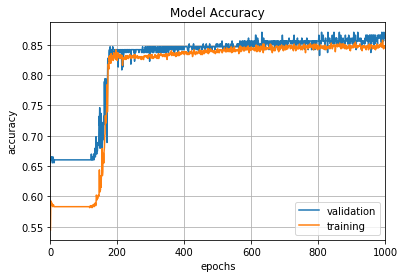

In [144]:
# 1
# fit SGD optimizer

model1 = ann_model2()
print(model1.summary())
model1.compile(loss=losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['accuracy'])
history1 = model1.fit(X_train, Y_train, 
                     validation_data=(X_test,
                                      Y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)
plot_fig(1, history1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_211 (Dense)            (None, 7)                 105       
_________________________________________________________________
dense_212 (Dense)            (None, 5)                 40        
_________________________________________________________________
dense_213 (Dense)            (None, 2)                 12        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________
None
Train on 625 samples, validate on 209 samples
Epoch 1/1000
 - 4s - loss: 0.6788 - acc: 0.6144 - val_loss: 0.6754 - val_acc: 0.5646
Epoch 2/1000
 - 0s - loss: 0.6502 - acc: 0.6144 - val_loss: 0.6609 - val_acc: 0.5646
Epoch 3/1000
 - 0s - loss: 0.6436 - acc: 0.6144 - val_loss: 0.6577 - val_acc: 0.5646
Epoch 4/1000
 - 0s - loss: 0.6319 - acc: 0.6144 - val_loss: 0.6377 - val_acc: 0.5646
Epoch 5/1000
 - 0

Epoch 88/1000
 - 0s - loss: 0.4411 - acc: 0.8368 - val_loss: 0.3880 - val_acc: 0.8517
Epoch 89/1000
 - 0s - loss: 0.4286 - acc: 0.8336 - val_loss: 0.3881 - val_acc: 0.8517
Epoch 90/1000
 - 0s - loss: 0.4278 - acc: 0.8400 - val_loss: 0.3971 - val_acc: 0.8517
Epoch 91/1000
 - 0s - loss: 0.4300 - acc: 0.8352 - val_loss: 0.4041 - val_acc: 0.8469
Epoch 92/1000
 - 0s - loss: 0.4301 - acc: 0.8368 - val_loss: 0.4184 - val_acc: 0.8421
Epoch 93/1000
 - 0s - loss: 0.4339 - acc: 0.8384 - val_loss: 0.3953 - val_acc: 0.8421
Epoch 94/1000
 - 0s - loss: 0.4252 - acc: 0.8336 - val_loss: 0.3932 - val_acc: 0.8517
Epoch 95/1000
 - 0s - loss: 0.4288 - acc: 0.8288 - val_loss: 0.3907 - val_acc: 0.8517
Epoch 96/1000
 - 0s - loss: 0.4327 - acc: 0.8304 - val_loss: 0.3896 - val_acc: 0.8517
Epoch 97/1000
 - 0s - loss: 0.4317 - acc: 0.8320 - val_loss: 0.4136 - val_acc: 0.8469
Epoch 98/1000
 - 0s - loss: 0.4319 - acc: 0.8304 - val_loss: 0.3882 - val_acc: 0.8517
Epoch 99/1000
 - 0s - loss: 0.4341 - acc: 0.8304 - val

Epoch 183/1000
 - 0s - loss: 0.4280 - acc: 0.8336 - val_loss: 0.3884 - val_acc: 0.8517
Epoch 184/1000
 - 0s - loss: 0.4276 - acc: 0.8352 - val_loss: 0.3955 - val_acc: 0.8421
Epoch 185/1000
 - 0s - loss: 0.4330 - acc: 0.8368 - val_loss: 0.3904 - val_acc: 0.8421
Epoch 186/1000
 - 0s - loss: 0.4273 - acc: 0.8288 - val_loss: 0.4004 - val_acc: 0.8421
Epoch 187/1000
 - 0s - loss: 0.4284 - acc: 0.8368 - val_loss: 0.4024 - val_acc: 0.8421
Epoch 188/1000
 - 0s - loss: 0.4370 - acc: 0.8320 - val_loss: 0.3878 - val_acc: 0.8517
Epoch 189/1000
 - 0s - loss: 0.4308 - acc: 0.8368 - val_loss: 0.3902 - val_acc: 0.8421
Epoch 190/1000
 - 0s - loss: 0.4220 - acc: 0.8368 - val_loss: 0.4021 - val_acc: 0.8469
Epoch 191/1000
 - 0s - loss: 0.4348 - acc: 0.8336 - val_loss: 0.3900 - val_acc: 0.8469
Epoch 192/1000
 - 0s - loss: 0.4288 - acc: 0.8336 - val_loss: 0.3890 - val_acc: 0.8517
Epoch 193/1000
 - 0s - loss: 0.4219 - acc: 0.8336 - val_loss: 0.4067 - val_acc: 0.8469
Epoch 194/1000
 - 0s - loss: 0.4285 - acc: 

Epoch 278/1000
 - 0s - loss: 0.4301 - acc: 0.8336 - val_loss: 0.3904 - val_acc: 0.8421
Epoch 279/1000
 - 0s - loss: 0.4289 - acc: 0.8336 - val_loss: 0.4016 - val_acc: 0.8421
Epoch 280/1000
 - 0s - loss: 0.4266 - acc: 0.8336 - val_loss: 0.4124 - val_acc: 0.8421
Epoch 281/1000
 - 0s - loss: 0.4344 - acc: 0.8320 - val_loss: 0.3904 - val_acc: 0.8421
Epoch 282/1000
 - 0s - loss: 0.4345 - acc: 0.8320 - val_loss: 0.3874 - val_acc: 0.8517
Epoch 283/1000
 - 0s - loss: 0.4305 - acc: 0.8304 - val_loss: 0.3874 - val_acc: 0.8517
Epoch 284/1000
 - 0s - loss: 0.4281 - acc: 0.8304 - val_loss: 0.4016 - val_acc: 0.8421
Epoch 285/1000
 - 0s - loss: 0.4347 - acc: 0.8320 - val_loss: 0.3878 - val_acc: 0.8517
Epoch 286/1000
 - 0s - loss: 0.4324 - acc: 0.8352 - val_loss: 0.3888 - val_acc: 0.8469
Epoch 287/1000
 - 0s - loss: 0.4264 - acc: 0.8352 - val_loss: 0.3911 - val_acc: 0.8421
Epoch 288/1000
 - 0s - loss: 0.4281 - acc: 0.8384 - val_loss: 0.3883 - val_acc: 0.8469
Epoch 289/1000
 - 0s - loss: 0.4271 - acc: 

 - 0s - loss: 0.4341 - acc: 0.8352 - val_loss: 0.4184 - val_acc: 0.8421
Epoch 373/1000
 - 0s - loss: 0.4298 - acc: 0.8384 - val_loss: 0.3879 - val_acc: 0.8517
Epoch 374/1000
 - 0s - loss: 0.4240 - acc: 0.8320 - val_loss: 0.3937 - val_acc: 0.8421
Epoch 375/1000
 - 0s - loss: 0.4295 - acc: 0.8416 - val_loss: 0.3885 - val_acc: 0.8517
Epoch 376/1000
 - 0s - loss: 0.4282 - acc: 0.8352 - val_loss: 0.4096 - val_acc: 0.8469
Epoch 377/1000
 - 0s - loss: 0.4311 - acc: 0.8368 - val_loss: 0.3935 - val_acc: 0.8517
Epoch 378/1000
 - 0s - loss: 0.4290 - acc: 0.8336 - val_loss: 0.3940 - val_acc: 0.8517
Epoch 379/1000
 - 0s - loss: 0.4282 - acc: 0.8304 - val_loss: 0.3919 - val_acc: 0.8421
Epoch 380/1000
 - 0s - loss: 0.4256 - acc: 0.8336 - val_loss: 0.3888 - val_acc: 0.8517
Epoch 381/1000
 - 0s - loss: 0.4310 - acc: 0.8336 - val_loss: 0.3875 - val_acc: 0.8517
Epoch 382/1000
 - 0s - loss: 0.4260 - acc: 0.8384 - val_loss: 0.3925 - val_acc: 0.8517
Epoch 383/1000
 - 0s - loss: 0.4327 - acc: 0.8320 - val_lo

Epoch 467/1000
 - 0s - loss: 0.4303 - acc: 0.8352 - val_loss: 0.3895 - val_acc: 0.8517
Epoch 468/1000
 - 0s - loss: 0.4293 - acc: 0.8336 - val_loss: 0.3884 - val_acc: 0.8517
Epoch 469/1000
 - 0s - loss: 0.4300 - acc: 0.8352 - val_loss: 0.3978 - val_acc: 0.8421
Epoch 470/1000
 - 0s - loss: 0.4249 - acc: 0.8336 - val_loss: 0.3912 - val_acc: 0.8469
Epoch 471/1000
 - 0s - loss: 0.4271 - acc: 0.8368 - val_loss: 0.3928 - val_acc: 0.8421
Epoch 472/1000
 - 0s - loss: 0.4259 - acc: 0.8400 - val_loss: 0.3903 - val_acc: 0.8469
Epoch 473/1000
 - 0s - loss: 0.4292 - acc: 0.8336 - val_loss: 0.3994 - val_acc: 0.8517
Epoch 474/1000
 - 0s - loss: 0.4295 - acc: 0.8320 - val_loss: 0.3910 - val_acc: 0.8469
Epoch 475/1000
 - 0s - loss: 0.4263 - acc: 0.8320 - val_loss: 0.3882 - val_acc: 0.8517
Epoch 476/1000
 - 0s - loss: 0.4251 - acc: 0.8384 - val_loss: 0.3911 - val_acc: 0.8517
Epoch 477/1000
 - 0s - loss: 0.4329 - acc: 0.8336 - val_loss: 0.3889 - val_acc: 0.8517
Epoch 478/1000
 - 0s - loss: 0.4280 - acc: 

 - 0s - loss: 0.4231 - acc: 0.8368 - val_loss: 0.3883 - val_acc: 0.8469
Epoch 562/1000
 - 0s - loss: 0.4254 - acc: 0.8368 - val_loss: 0.3901 - val_acc: 0.8517
Epoch 563/1000
 - 0s - loss: 0.4301 - acc: 0.8352 - val_loss: 0.3870 - val_acc: 0.8517
Epoch 564/1000
 - 0s - loss: 0.4224 - acc: 0.8352 - val_loss: 0.3892 - val_acc: 0.8517
Epoch 565/1000
 - 0s - loss: 0.4235 - acc: 0.8320 - val_loss: 0.3885 - val_acc: 0.8517
Epoch 566/1000
 - 0s - loss: 0.4223 - acc: 0.8336 - val_loss: 0.3872 - val_acc: 0.8469
Epoch 567/1000
 - 0s - loss: 0.4243 - acc: 0.8336 - val_loss: 0.3857 - val_acc: 0.8517
Epoch 568/1000
 - 0s - loss: 0.4252 - acc: 0.8368 - val_loss: 0.3850 - val_acc: 0.8517
Epoch 569/1000
 - 0s - loss: 0.4272 - acc: 0.8304 - val_loss: 0.3856 - val_acc: 0.8517
Epoch 570/1000
 - 0s - loss: 0.4254 - acc: 0.8384 - val_loss: 0.3873 - val_acc: 0.8517
Epoch 571/1000
 - 0s - loss: 0.4257 - acc: 0.8368 - val_loss: 0.3962 - val_acc: 0.8421
Epoch 572/1000
 - 0s - loss: 0.4219 - acc: 0.8368 - val_lo

Epoch 656/1000
 - 0s - loss: 0.3900 - acc: 0.8544 - val_loss: 0.3920 - val_acc: 0.8421
Epoch 657/1000
 - 0s - loss: 0.3901 - acc: 0.8512 - val_loss: 0.3854 - val_acc: 0.8517
Epoch 658/1000
 - 0s - loss: 0.3826 - acc: 0.8528 - val_loss: 0.3932 - val_acc: 0.8612
Epoch 659/1000
 - 0s - loss: 0.3849 - acc: 0.8512 - val_loss: 0.3828 - val_acc: 0.8469
Epoch 660/1000
 - 0s - loss: 0.3818 - acc: 0.8544 - val_loss: 0.3838 - val_acc: 0.8565
Epoch 661/1000
 - 0s - loss: 0.3880 - acc: 0.8464 - val_loss: 0.3830 - val_acc: 0.8421
Epoch 662/1000
 - 0s - loss: 0.3830 - acc: 0.8544 - val_loss: 0.3787 - val_acc: 0.8469
Epoch 663/1000
 - 0s - loss: 0.3893 - acc: 0.8528 - val_loss: 0.3816 - val_acc: 0.8421
Epoch 664/1000
 - 0s - loss: 0.3813 - acc: 0.8544 - val_loss: 0.3815 - val_acc: 0.8469
Epoch 665/1000
 - 0s - loss: 0.3796 - acc: 0.8464 - val_loss: 0.3819 - val_acc: 0.8517
Epoch 666/1000
 - 0s - loss: 0.3840 - acc: 0.8528 - val_loss: 0.3905 - val_acc: 0.8469
Epoch 667/1000
 - 0s - loss: 0.3854 - acc: 

 - 0s - loss: 0.3735 - acc: 0.8448 - val_loss: 0.4011 - val_acc: 0.8325
Epoch 751/1000
 - 0s - loss: 0.3685 - acc: 0.8608 - val_loss: 0.3987 - val_acc: 0.8278
Epoch 752/1000
 - 0s - loss: 0.3699 - acc: 0.8560 - val_loss: 0.4032 - val_acc: 0.8469
Epoch 753/1000
 - 0s - loss: 0.3743 - acc: 0.8528 - val_loss: 0.3950 - val_acc: 0.8469
Epoch 754/1000
 - 0s - loss: 0.3729 - acc: 0.8512 - val_loss: 0.4091 - val_acc: 0.8469
Epoch 755/1000
 - 0s - loss: 0.3756 - acc: 0.8544 - val_loss: 0.3979 - val_acc: 0.8373
Epoch 756/1000
 - 0s - loss: 0.3734 - acc: 0.8560 - val_loss: 0.3960 - val_acc: 0.8421
Epoch 757/1000
 - 0s - loss: 0.3728 - acc: 0.8560 - val_loss: 0.3967 - val_acc: 0.8325
Epoch 758/1000
 - 0s - loss: 0.3671 - acc: 0.8544 - val_loss: 0.4000 - val_acc: 0.8421
Epoch 759/1000
 - 0s - loss: 0.3704 - acc: 0.8560 - val_loss: 0.4009 - val_acc: 0.8325
Epoch 760/1000
 - 0s - loss: 0.3677 - acc: 0.8496 - val_loss: 0.3993 - val_acc: 0.8469
Epoch 761/1000
 - 0s - loss: 0.3737 - acc: 0.8544 - val_lo

Epoch 845/1000
 - 0s - loss: 0.3707 - acc: 0.8480 - val_loss: 0.4080 - val_acc: 0.8325
Epoch 846/1000
 - 0s - loss: 0.3689 - acc: 0.8560 - val_loss: 0.4119 - val_acc: 0.8278
Epoch 847/1000
 - 0s - loss: 0.3685 - acc: 0.8496 - val_loss: 0.4117 - val_acc: 0.8325
Epoch 848/1000
 - 0s - loss: 0.3680 - acc: 0.8576 - val_loss: 0.4067 - val_acc: 0.8373
Epoch 849/1000
 - 0s - loss: 0.3674 - acc: 0.8544 - val_loss: 0.4093 - val_acc: 0.8373
Epoch 850/1000
 - 0s - loss: 0.3652 - acc: 0.8544 - val_loss: 0.4124 - val_acc: 0.8421
Epoch 851/1000
 - 0s - loss: 0.3682 - acc: 0.8528 - val_loss: 0.4094 - val_acc: 0.8325
Epoch 852/1000
 - 0s - loss: 0.3665 - acc: 0.8496 - val_loss: 0.4084 - val_acc: 0.8325
Epoch 853/1000
 - 0s - loss: 0.3616 - acc: 0.8560 - val_loss: 0.4119 - val_acc: 0.8325
Epoch 854/1000
 - 0s - loss: 0.3677 - acc: 0.8512 - val_loss: 0.4070 - val_acc: 0.8325
Epoch 855/1000
 - 0s - loss: 0.3697 - acc: 0.8544 - val_loss: 0.4135 - val_acc: 0.8325
Epoch 856/1000
 - 0s - loss: 0.3698 - acc: 

 - 0s - loss: 0.3618 - acc: 0.8528 - val_loss: 0.4141 - val_acc: 0.8278
Epoch 940/1000
 - 0s - loss: 0.3655 - acc: 0.8608 - val_loss: 0.4188 - val_acc: 0.8278
Epoch 941/1000
 - 0s - loss: 0.3643 - acc: 0.8544 - val_loss: 0.4152 - val_acc: 0.8325
Epoch 942/1000
 - 0s - loss: 0.3606 - acc: 0.8560 - val_loss: 0.4198 - val_acc: 0.8325
Epoch 943/1000
 - 0s - loss: 0.3644 - acc: 0.8592 - val_loss: 0.4137 - val_acc: 0.8325
Epoch 944/1000
 - 0s - loss: 0.3588 - acc: 0.8624 - val_loss: 0.4232 - val_acc: 0.8373
Epoch 945/1000
 - 0s - loss: 0.3597 - acc: 0.8640 - val_loss: 0.4227 - val_acc: 0.8325
Epoch 946/1000
 - 0s - loss: 0.3621 - acc: 0.8528 - val_loss: 0.4170 - val_acc: 0.8373
Epoch 947/1000
 - 0s - loss: 0.3652 - acc: 0.8624 - val_loss: 0.4202 - val_acc: 0.8278
Epoch 948/1000
 - 0s - loss: 0.3616 - acc: 0.8592 - val_loss: 0.4123 - val_acc: 0.8373
Epoch 949/1000
 - 0s - loss: 0.3641 - acc: 0.8624 - val_loss: 0.4210 - val_acc: 0.8325
Epoch 950/1000
 - 0s - loss: 0.3635 - acc: 0.8544 - val_lo

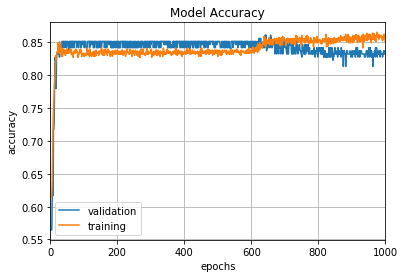

In [119]:
# 2
# fit RMSProp optimizer

model2 = ann_model2()
print(model2.summary())
model2.compile(loss=losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
              metrics=['accuracy'])
history2 = model2.fit(X_train, Y_train, 
                     validation_data=(X_test, Y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)
plot_fig(1, history2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_214 (Dense)            (None, 7)                 105       
_________________________________________________________________
dense_215 (Dense)            (None, 5)                 40        
_________________________________________________________________
dense_216 (Dense)            (None, 2)                 12        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________
None
Train on 625 samples, validate on 209 samples
Epoch 1/1000
 - 5s - loss: 0.8040 - acc: 0.5616 - val_loss: 0.6821 - val_acc: 0.6507
Epoch 2/1000
 - 0s - loss: 0.6764 - acc: 0.6592 - val_loss: 0.6768 - val_acc: 0.6507
Epoch 3/1000
 - 0s - loss: 0.6700 - acc: 0.6848 - val_loss: 0.6732 - val_acc: 0.6316
Epoch 4/1000
 - 0s - loss: 0.6637 - acc: 0.6992 - val_loss: 0.6702 - val_acc: 0.6172
Epoch 5/1000
 - 0

Epoch 88/1000
 - 0s - loss: 0.4173 - acc: 0.8480 - val_loss: 0.4136 - val_acc: 0.8421
Epoch 89/1000
 - 0s - loss: 0.4194 - acc: 0.8464 - val_loss: 0.4166 - val_acc: 0.8421
Epoch 90/1000
 - 0s - loss: 0.4173 - acc: 0.8448 - val_loss: 0.4151 - val_acc: 0.8373
Epoch 91/1000
 - 0s - loss: 0.4171 - acc: 0.8384 - val_loss: 0.4195 - val_acc: 0.8373
Epoch 92/1000
 - 0s - loss: 0.4165 - acc: 0.8432 - val_loss: 0.4138 - val_acc: 0.8421
Epoch 93/1000
 - 0s - loss: 0.4149 - acc: 0.8448 - val_loss: 0.4144 - val_acc: 0.8373
Epoch 94/1000
 - 0s - loss: 0.4142 - acc: 0.8464 - val_loss: 0.4207 - val_acc: 0.8278
Epoch 95/1000
 - 0s - loss: 0.4144 - acc: 0.8464 - val_loss: 0.4150 - val_acc: 0.8325
Epoch 96/1000
 - 0s - loss: 0.4149 - acc: 0.8448 - val_loss: 0.4134 - val_acc: 0.8325
Epoch 97/1000
 - 0s - loss: 0.4120 - acc: 0.8432 - val_loss: 0.4128 - val_acc: 0.8325
Epoch 98/1000
 - 0s - loss: 0.4125 - acc: 0.8400 - val_loss: 0.4132 - val_acc: 0.8325
Epoch 99/1000
 - 0s - loss: 0.4122 - acc: 0.8448 - val

Epoch 183/1000
 - 0s - loss: 0.3892 - acc: 0.8432 - val_loss: 0.3917 - val_acc: 0.8421
Epoch 184/1000
 - 0s - loss: 0.3904 - acc: 0.8432 - val_loss: 0.3913 - val_acc: 0.8421
Epoch 185/1000
 - 0s - loss: 0.3892 - acc: 0.8448 - val_loss: 0.3877 - val_acc: 0.8469
Epoch 186/1000
 - 0s - loss: 0.3892 - acc: 0.8512 - val_loss: 0.3872 - val_acc: 0.8469
Epoch 187/1000
 - 0s - loss: 0.3900 - acc: 0.8432 - val_loss: 0.3875 - val_acc: 0.8469
Epoch 188/1000
 - 0s - loss: 0.3893 - acc: 0.8400 - val_loss: 0.3868 - val_acc: 0.8469
Epoch 189/1000
 - 0s - loss: 0.3892 - acc: 0.8448 - val_loss: 0.3885 - val_acc: 0.8469
Epoch 190/1000
 - 0s - loss: 0.3888 - acc: 0.8528 - val_loss: 0.3879 - val_acc: 0.8469
Epoch 191/1000
 - 0s - loss: 0.3902 - acc: 0.8448 - val_loss: 0.3876 - val_acc: 0.8469
Epoch 192/1000
 - 0s - loss: 0.3885 - acc: 0.8464 - val_loss: 0.3916 - val_acc: 0.8373
Epoch 193/1000
 - 0s - loss: 0.3893 - acc: 0.8432 - val_loss: 0.3888 - val_acc: 0.8421
Epoch 194/1000
 - 0s - loss: 0.3885 - acc: 

 - 0s - loss: 0.3827 - acc: 0.8544 - val_loss: 0.3843 - val_acc: 0.8421
Epoch 278/1000
 - 0s - loss: 0.3823 - acc: 0.8528 - val_loss: 0.3837 - val_acc: 0.8421
Epoch 279/1000
 - 0s - loss: 0.3820 - acc: 0.8512 - val_loss: 0.3833 - val_acc: 0.8421
Epoch 280/1000
 - 0s - loss: 0.3826 - acc: 0.8512 - val_loss: 0.3865 - val_acc: 0.8421
Epoch 281/1000
 - 0s - loss: 0.3825 - acc: 0.8528 - val_loss: 0.3828 - val_acc: 0.8469
Epoch 282/1000
 - 0s - loss: 0.3823 - acc: 0.8464 - val_loss: 0.3832 - val_acc: 0.8421
Epoch 283/1000
 - 0s - loss: 0.3824 - acc: 0.8496 - val_loss: 0.3845 - val_acc: 0.8469
Epoch 284/1000
 - 0s - loss: 0.3824 - acc: 0.8496 - val_loss: 0.3821 - val_acc: 0.8421
Epoch 285/1000
 - 0s - loss: 0.3820 - acc: 0.8496 - val_loss: 0.3856 - val_acc: 0.8469
Epoch 286/1000
 - 0s - loss: 0.3826 - acc: 0.8480 - val_loss: 0.3826 - val_acc: 0.8421
Epoch 287/1000
 - 0s - loss: 0.3830 - acc: 0.8496 - val_loss: 0.3853 - val_acc: 0.8469
Epoch 288/1000
 - 0s - loss: 0.3819 - acc: 0.8512 - val_lo

Epoch 372/1000
 - 0s - loss: 0.3793 - acc: 0.8528 - val_loss: 0.3829 - val_acc: 0.8421
Epoch 373/1000
 - 0s - loss: 0.3789 - acc: 0.8560 - val_loss: 0.3834 - val_acc: 0.8469
Epoch 374/1000
 - 0s - loss: 0.3797 - acc: 0.8496 - val_loss: 0.3823 - val_acc: 0.8421
Epoch 375/1000
 - 0s - loss: 0.3791 - acc: 0.8512 - val_loss: 0.3824 - val_acc: 0.8421
Epoch 376/1000
 - 0s - loss: 0.3792 - acc: 0.8528 - val_loss: 0.3829 - val_acc: 0.8421
Epoch 377/1000
 - 0s - loss: 0.3796 - acc: 0.8560 - val_loss: 0.3846 - val_acc: 0.8469
Epoch 378/1000
 - 0s - loss: 0.3797 - acc: 0.8544 - val_loss: 0.3816 - val_acc: 0.8469
Epoch 379/1000
 - 0s - loss: 0.3791 - acc: 0.8544 - val_loss: 0.3842 - val_acc: 0.8469
Epoch 380/1000
 - 0s - loss: 0.3795 - acc: 0.8512 - val_loss: 0.3834 - val_acc: 0.8421
Epoch 381/1000
 - 0s - loss: 0.3790 - acc: 0.8544 - val_loss: 0.3825 - val_acc: 0.8469
Epoch 382/1000
 - 0s - loss: 0.3794 - acc: 0.8576 - val_loss: 0.3850 - val_acc: 0.8469
Epoch 383/1000
 - 0s - loss: 0.3794 - acc: 

 - 0s - loss: 0.3767 - acc: 0.8576 - val_loss: 0.3838 - val_acc: 0.8469
Epoch 467/1000
 - 0s - loss: 0.3769 - acc: 0.8576 - val_loss: 0.3827 - val_acc: 0.8421
Epoch 468/1000
 - 0s - loss: 0.3769 - acc: 0.8576 - val_loss: 0.3818 - val_acc: 0.8469
Epoch 469/1000
 - 0s - loss: 0.3770 - acc: 0.8544 - val_loss: 0.3817 - val_acc: 0.8469
Epoch 470/1000
 - 0s - loss: 0.3764 - acc: 0.8528 - val_loss: 0.3806 - val_acc: 0.8469
Epoch 471/1000
 - 0s - loss: 0.3773 - acc: 0.8560 - val_loss: 0.3822 - val_acc: 0.8421
Epoch 472/1000
 - 0s - loss: 0.3773 - acc: 0.8576 - val_loss: 0.3834 - val_acc: 0.8469
Epoch 473/1000
 - 0s - loss: 0.3765 - acc: 0.8560 - val_loss: 0.3814 - val_acc: 0.8469
Epoch 474/1000
 - 0s - loss: 0.3768 - acc: 0.8544 - val_loss: 0.3822 - val_acc: 0.8469
Epoch 475/1000
 - 0s - loss: 0.3769 - acc: 0.8544 - val_loss: 0.3827 - val_acc: 0.8421
Epoch 476/1000
 - 0s - loss: 0.3767 - acc: 0.8560 - val_loss: 0.3814 - val_acc: 0.8469
Epoch 477/1000
 - 0s - loss: 0.3771 - acc: 0.8544 - val_lo

Epoch 561/1000
 - 0s - loss: 0.3743 - acc: 0.8608 - val_loss: 0.3806 - val_acc: 0.8421
Epoch 562/1000
 - 0s - loss: 0.3742 - acc: 0.8592 - val_loss: 0.3801 - val_acc: 0.8469
Epoch 563/1000
 - 0s - loss: 0.3742 - acc: 0.8576 - val_loss: 0.3816 - val_acc: 0.8421
Epoch 564/1000
 - 0s - loss: 0.3739 - acc: 0.8576 - val_loss: 0.3810 - val_acc: 0.8421
Epoch 565/1000
 - 0s - loss: 0.3741 - acc: 0.8560 - val_loss: 0.3820 - val_acc: 0.8421
Epoch 566/1000
 - 0s - loss: 0.3739 - acc: 0.8560 - val_loss: 0.3795 - val_acc: 0.8421
Epoch 567/1000
 - 0s - loss: 0.3739 - acc: 0.8576 - val_loss: 0.3800 - val_acc: 0.8421
Epoch 568/1000
 - 0s - loss: 0.3744 - acc: 0.8576 - val_loss: 0.3826 - val_acc: 0.8421
Epoch 569/1000
 - 0s - loss: 0.3739 - acc: 0.8592 - val_loss: 0.3825 - val_acc: 0.8421
Epoch 570/1000
 - 0s - loss: 0.3742 - acc: 0.8576 - val_loss: 0.3832 - val_acc: 0.8421
Epoch 571/1000
 - 0s - loss: 0.3741 - acc: 0.8592 - val_loss: 0.3819 - val_acc: 0.8421
Epoch 572/1000
 - 0s - loss: 0.3743 - acc: 

 - 0s - loss: 0.3714 - acc: 0.8608 - val_loss: 0.3817 - val_acc: 0.8469
Epoch 656/1000
 - 0s - loss: 0.3717 - acc: 0.8560 - val_loss: 0.3794 - val_acc: 0.8421
Epoch 657/1000
 - 0s - loss: 0.3714 - acc: 0.8592 - val_loss: 0.3824 - val_acc: 0.8469
Epoch 658/1000
 - 0s - loss: 0.3716 - acc: 0.8592 - val_loss: 0.3796 - val_acc: 0.8421
Epoch 659/1000
 - 0s - loss: 0.3710 - acc: 0.8608 - val_loss: 0.3811 - val_acc: 0.8469
Epoch 660/1000
 - 0s - loss: 0.3712 - acc: 0.8592 - val_loss: 0.3821 - val_acc: 0.8469
Epoch 661/1000
 - 0s - loss: 0.3715 - acc: 0.8576 - val_loss: 0.3813 - val_acc: 0.8469
Epoch 662/1000
 - 0s - loss: 0.3710 - acc: 0.8592 - val_loss: 0.3790 - val_acc: 0.8373
Epoch 663/1000
 - 0s - loss: 0.3718 - acc: 0.8592 - val_loss: 0.3785 - val_acc: 0.8421
Epoch 664/1000
 - 0s - loss: 0.3710 - acc: 0.8592 - val_loss: 0.3799 - val_acc: 0.8421
Epoch 665/1000
 - 0s - loss: 0.3709 - acc: 0.8592 - val_loss: 0.3818 - val_acc: 0.8469
Epoch 666/1000
 - 0s - loss: 0.3710 - acc: 0.8592 - val_lo

Epoch 750/1000
 - 0s - loss: 0.3687 - acc: 0.8592 - val_loss: 0.3778 - val_acc: 0.8421
Epoch 751/1000
 - 0s - loss: 0.3687 - acc: 0.8624 - val_loss: 0.3792 - val_acc: 0.8421
Epoch 752/1000
 - 0s - loss: 0.3683 - acc: 0.8608 - val_loss: 0.3788 - val_acc: 0.8421
Epoch 753/1000
 - 0s - loss: 0.3687 - acc: 0.8608 - val_loss: 0.3792 - val_acc: 0.8373
Epoch 754/1000
 - 0s - loss: 0.3682 - acc: 0.8624 - val_loss: 0.3814 - val_acc: 0.8421
Epoch 755/1000
 - 0s - loss: 0.3691 - acc: 0.8608 - val_loss: 0.3790 - val_acc: 0.8373
Epoch 756/1000
 - 0s - loss: 0.3686 - acc: 0.8608 - val_loss: 0.3772 - val_acc: 0.8421
Epoch 757/1000
 - 0s - loss: 0.3688 - acc: 0.8624 - val_loss: 0.3781 - val_acc: 0.8421
Epoch 758/1000
 - 0s - loss: 0.3685 - acc: 0.8608 - val_loss: 0.3786 - val_acc: 0.8373
Epoch 759/1000
 - 0s - loss: 0.3685 - acc: 0.8608 - val_loss: 0.3780 - val_acc: 0.8421
Epoch 760/1000
 - 0s - loss: 0.3684 - acc: 0.8624 - val_loss: 0.3790 - val_acc: 0.8373
Epoch 761/1000
 - 0s - loss: 0.3685 - acc: 

 - 0s - loss: 0.3671 - acc: 0.8592 - val_loss: 0.3789 - val_acc: 0.8469
Epoch 845/1000
 - 0s - loss: 0.3667 - acc: 0.8608 - val_loss: 0.3781 - val_acc: 0.8421
Epoch 846/1000
 - 0s - loss: 0.3669 - acc: 0.8608 - val_loss: 0.3788 - val_acc: 0.8421
Epoch 847/1000
 - 0s - loss: 0.3666 - acc: 0.8624 - val_loss: 0.3804 - val_acc: 0.8421
Epoch 848/1000
 - 0s - loss: 0.3666 - acc: 0.8608 - val_loss: 0.3795 - val_acc: 0.8421
Epoch 849/1000
 - 0s - loss: 0.3669 - acc: 0.8608 - val_loss: 0.3785 - val_acc: 0.8421
Epoch 850/1000
 - 0s - loss: 0.3665 - acc: 0.8640 - val_loss: 0.3819 - val_acc: 0.8421
Epoch 851/1000
 - 0s - loss: 0.3662 - acc: 0.8592 - val_loss: 0.3781 - val_acc: 0.8421
Epoch 852/1000
 - 0s - loss: 0.3669 - acc: 0.8624 - val_loss: 0.3791 - val_acc: 0.8421
Epoch 853/1000
 - 0s - loss: 0.3668 - acc: 0.8608 - val_loss: 0.3789 - val_acc: 0.8373
Epoch 854/1000
 - 0s - loss: 0.3665 - acc: 0.8608 - val_loss: 0.3780 - val_acc: 0.8421
Epoch 855/1000
 - 0s - loss: 0.3668 - acc: 0.8624 - val_lo

Epoch 939/1000
 - 0s - loss: 0.3642 - acc: 0.8624 - val_loss: 0.3811 - val_acc: 0.8469
Epoch 940/1000
 - 0s - loss: 0.3642 - acc: 0.8592 - val_loss: 0.3804 - val_acc: 0.8421
Epoch 941/1000
 - 0s - loss: 0.3642 - acc: 0.8624 - val_loss: 0.3809 - val_acc: 0.8469
Epoch 942/1000
 - 0s - loss: 0.3640 - acc: 0.8624 - val_loss: 0.3816 - val_acc: 0.8469
Epoch 943/1000
 - 0s - loss: 0.3641 - acc: 0.8624 - val_loss: 0.3820 - val_acc: 0.8421
Epoch 944/1000
 - 0s - loss: 0.3641 - acc: 0.8624 - val_loss: 0.3819 - val_acc: 0.8469
Epoch 945/1000
 - 0s - loss: 0.3643 - acc: 0.8608 - val_loss: 0.3808 - val_acc: 0.8421
Epoch 946/1000
 - 0s - loss: 0.3639 - acc: 0.8624 - val_loss: 0.3813 - val_acc: 0.8469
Epoch 947/1000
 - 0s - loss: 0.3639 - acc: 0.8608 - val_loss: 0.3809 - val_acc: 0.8421
Epoch 948/1000
 - 0s - loss: 0.3639 - acc: 0.8624 - val_loss: 0.3809 - val_acc: 0.8421
Epoch 949/1000
 - 0s - loss: 0.3639 - acc: 0.8624 - val_loss: 0.3813 - val_acc: 0.8469
Epoch 950/1000
 - 0s - loss: 0.3639 - acc: 

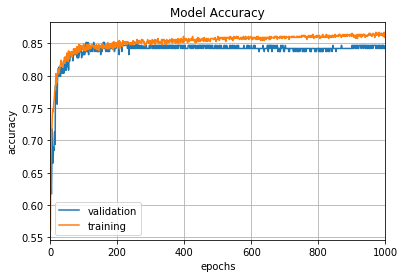

In [120]:
# 3
# fit Adagrad optimizer

model3 = ann_model2()
print(model3.summary())
model3.compile(loss=losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
              metrics=['accuracy'])
history3 = model3.fit(X_train, Y_train, 
                     validation_data=(X_test, Y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)
plot_fig(1, history3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_217 (Dense)            (None, 7)                 105       
_________________________________________________________________
dense_218 (Dense)            (None, 5)                 40        
_________________________________________________________________
dense_219 (Dense)            (None, 2)                 12        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________
None
Train on 625 samples, validate on 209 samples
Epoch 1/1000
 - 7s - loss: 0.9868 - acc: 0.3856 - val_loss: 0.7425 - val_acc: 0.4354
Epoch 2/1000
 - 0s - loss: 0.7030 - acc: 0.4976 - val_loss: 0.6863 - val_acc: 0.5646
Epoch 3/1000
 - 0s - loss: 0.6792 - acc: 0.6224 - val_loss: 0.6852 - val_acc: 0.5646
Epoch 4/1000
 - 0s - loss: 0.6764 - acc: 0.6176 - val_loss: 0.6826 - val_acc: 0.5694
Epoch 5/1000
 - 0

Epoch 88/1000
 - 0s - loss: 0.3868 - acc: 0.8480 - val_loss: 0.3746 - val_acc: 0.8469
Epoch 89/1000
 - 0s - loss: 0.3883 - acc: 0.8384 - val_loss: 0.3768 - val_acc: 0.8469
Epoch 90/1000
 - 0s - loss: 0.3850 - acc: 0.8448 - val_loss: 0.3732 - val_acc: 0.8517
Epoch 91/1000
 - 0s - loss: 0.3904 - acc: 0.8416 - val_loss: 0.3779 - val_acc: 0.8469
Epoch 92/1000
 - 0s - loss: 0.3859 - acc: 0.8480 - val_loss: 0.3769 - val_acc: 0.8469
Epoch 93/1000
 - 0s - loss: 0.3820 - acc: 0.8464 - val_loss: 0.4156 - val_acc: 0.8230
Epoch 94/1000
 - 0s - loss: 0.3860 - acc: 0.8432 - val_loss: 0.3856 - val_acc: 0.8373
Epoch 95/1000
 - 0s - loss: 0.3834 - acc: 0.8496 - val_loss: 0.3769 - val_acc: 0.8469
Epoch 96/1000
 - 0s - loss: 0.3844 - acc: 0.8496 - val_loss: 0.3757 - val_acc: 0.8469
Epoch 97/1000
 - 0s - loss: 0.3880 - acc: 0.8512 - val_loss: 0.3756 - val_acc: 0.8421
Epoch 98/1000
 - 0s - loss: 0.3822 - acc: 0.8496 - val_loss: 0.3817 - val_acc: 0.8373
Epoch 99/1000
 - 0s - loss: 0.3801 - acc: 0.8496 - val

Epoch 183/1000
 - 0s - loss: 0.3758 - acc: 0.8544 - val_loss: 0.3807 - val_acc: 0.8421
Epoch 184/1000
 - 0s - loss: 0.3726 - acc: 0.8560 - val_loss: 0.3813 - val_acc: 0.8421
Epoch 185/1000
 - 0s - loss: 0.3728 - acc: 0.8592 - val_loss: 0.3859 - val_acc: 0.8278
Epoch 186/1000
 - 0s - loss: 0.3745 - acc: 0.8576 - val_loss: 0.3837 - val_acc: 0.8373
Epoch 187/1000
 - 0s - loss: 0.3774 - acc: 0.8544 - val_loss: 0.3968 - val_acc: 0.8278
Epoch 188/1000
 - 0s - loss: 0.3747 - acc: 0.8512 - val_loss: 0.3796 - val_acc: 0.8421
Epoch 189/1000
 - 0s - loss: 0.3787 - acc: 0.8512 - val_loss: 0.3843 - val_acc: 0.8325
Epoch 190/1000
 - 0s - loss: 0.3733 - acc: 0.8592 - val_loss: 0.3972 - val_acc: 0.8230
Epoch 191/1000
 - 0s - loss: 0.3759 - acc: 0.8464 - val_loss: 0.3888 - val_acc: 0.8373
Epoch 192/1000
 - 0s - loss: 0.3795 - acc: 0.8512 - val_loss: 0.3768 - val_acc: 0.8325
Epoch 193/1000
 - 0s - loss: 0.3709 - acc: 0.8576 - val_loss: 0.3776 - val_acc: 0.8469
Epoch 194/1000
 - 0s - loss: 0.3723 - acc: 

 - 0s - loss: 0.3717 - acc: 0.8464 - val_loss: 0.3936 - val_acc: 0.8278
Epoch 278/1000
 - 0s - loss: 0.3708 - acc: 0.8528 - val_loss: 0.3813 - val_acc: 0.8373
Epoch 279/1000
 - 0s - loss: 0.3746 - acc: 0.8528 - val_loss: 0.3866 - val_acc: 0.8373
Epoch 280/1000
 - 0s - loss: 0.3722 - acc: 0.8528 - val_loss: 0.3892 - val_acc: 0.8278
Epoch 281/1000
 - 0s - loss: 0.3689 - acc: 0.8592 - val_loss: 0.3918 - val_acc: 0.8373
Epoch 282/1000
 - 0s - loss: 0.3648 - acc: 0.8656 - val_loss: 0.3789 - val_acc: 0.8373
Epoch 283/1000
 - 0s - loss: 0.3671 - acc: 0.8560 - val_loss: 0.3878 - val_acc: 0.8421
Epoch 284/1000
 - 0s - loss: 0.3748 - acc: 0.8544 - val_loss: 0.3872 - val_acc: 0.8421
Epoch 285/1000
 - 0s - loss: 0.3693 - acc: 0.8560 - val_loss: 0.3840 - val_acc: 0.8421
Epoch 286/1000
 - 0s - loss: 0.3667 - acc: 0.8624 - val_loss: 0.3944 - val_acc: 0.8325
Epoch 287/1000
 - 0s - loss: 0.3665 - acc: 0.8560 - val_loss: 0.3913 - val_acc: 0.8278
Epoch 288/1000
 - 0s - loss: 0.3708 - acc: 0.8464 - val_lo

Epoch 372/1000
 - 0s - loss: 0.3682 - acc: 0.8576 - val_loss: 0.3964 - val_acc: 0.8325
Epoch 373/1000
 - 0s - loss: 0.3659 - acc: 0.8608 - val_loss: 0.3967 - val_acc: 0.8469
Epoch 374/1000
 - 0s - loss: 0.3661 - acc: 0.8592 - val_loss: 0.3995 - val_acc: 0.8278
Epoch 375/1000
 - 0s - loss: 0.3675 - acc: 0.8544 - val_loss: 0.3958 - val_acc: 0.8421
Epoch 376/1000
 - 0s - loss: 0.3646 - acc: 0.8576 - val_loss: 0.3888 - val_acc: 0.8421
Epoch 377/1000
 - 0s - loss: 0.3679 - acc: 0.8544 - val_loss: 0.3938 - val_acc: 0.8373
Epoch 378/1000
 - 0s - loss: 0.3664 - acc: 0.8624 - val_loss: 0.3925 - val_acc: 0.8373
Epoch 379/1000
 - 0s - loss: 0.3711 - acc: 0.8528 - val_loss: 0.3916 - val_acc: 0.8373
Epoch 380/1000
 - 0s - loss: 0.3698 - acc: 0.8512 - val_loss: 0.3957 - val_acc: 0.8421
Epoch 381/1000
 - 0s - loss: 0.3640 - acc: 0.8624 - val_loss: 0.3975 - val_acc: 0.8565
Epoch 382/1000
 - 0s - loss: 0.3653 - acc: 0.8624 - val_loss: 0.3831 - val_acc: 0.8373
Epoch 383/1000
 - 0s - loss: 0.3666 - acc: 

 - 0s - loss: 0.3628 - acc: 0.8608 - val_loss: 0.4072 - val_acc: 0.8469
Epoch 467/1000
 - 0s - loss: 0.3665 - acc: 0.8560 - val_loss: 0.4052 - val_acc: 0.8325
Epoch 468/1000
 - 0s - loss: 0.3658 - acc: 0.8560 - val_loss: 0.4086 - val_acc: 0.8517
Epoch 469/1000
 - 0s - loss: 0.3649 - acc: 0.8592 - val_loss: 0.4154 - val_acc: 0.8325
Epoch 470/1000
 - 0s - loss: 0.3655 - acc: 0.8528 - val_loss: 0.4008 - val_acc: 0.8325
Epoch 471/1000
 - 0s - loss: 0.3615 - acc: 0.8608 - val_loss: 0.4311 - val_acc: 0.8325
Epoch 472/1000
 - 0s - loss: 0.3643 - acc: 0.8528 - val_loss: 0.4012 - val_acc: 0.8373
Epoch 473/1000
 - 0s - loss: 0.3636 - acc: 0.8672 - val_loss: 0.4072 - val_acc: 0.8421
Epoch 474/1000
 - 0s - loss: 0.3675 - acc: 0.8560 - val_loss: 0.4071 - val_acc: 0.8373
Epoch 475/1000
 - 0s - loss: 0.3611 - acc: 0.8624 - val_loss: 0.4160 - val_acc: 0.8373
Epoch 476/1000
 - 0s - loss: 0.3624 - acc: 0.8528 - val_loss: 0.4014 - val_acc: 0.8373
Epoch 477/1000
 - 0s - loss: 0.3654 - acc: 0.8608 - val_lo

Epoch 561/1000
 - 0s - loss: 0.3633 - acc: 0.8608 - val_loss: 0.4116 - val_acc: 0.8469
Epoch 562/1000
 - 0s - loss: 0.3600 - acc: 0.8592 - val_loss: 0.4098 - val_acc: 0.8325
Epoch 563/1000
 - 0s - loss: 0.3656 - acc: 0.8560 - val_loss: 0.4084 - val_acc: 0.8373
Epoch 564/1000
 - 0s - loss: 0.3647 - acc: 0.8640 - val_loss: 0.4037 - val_acc: 0.8421
Epoch 565/1000
 - 0s - loss: 0.3646 - acc: 0.8656 - val_loss: 0.4099 - val_acc: 0.8278
Epoch 566/1000
 - 0s - loss: 0.3613 - acc: 0.8544 - val_loss: 0.4039 - val_acc: 0.8278
Epoch 567/1000
 - 0s - loss: 0.3615 - acc: 0.8640 - val_loss: 0.4117 - val_acc: 0.8373
Epoch 568/1000
 - 0s - loss: 0.3628 - acc: 0.8608 - val_loss: 0.4117 - val_acc: 0.8421
Epoch 569/1000
 - 0s - loss: 0.3609 - acc: 0.8624 - val_loss: 0.4093 - val_acc: 0.8278
Epoch 570/1000
 - 0s - loss: 0.3617 - acc: 0.8592 - val_loss: 0.4114 - val_acc: 0.8373
Epoch 571/1000
 - 0s - loss: 0.3639 - acc: 0.8576 - val_loss: 0.4113 - val_acc: 0.8230
Epoch 572/1000
 - 0s - loss: 0.3610 - acc: 

 - 0s - loss: 0.3559 - acc: 0.8624 - val_loss: 0.4177 - val_acc: 0.8469
Epoch 656/1000
 - 0s - loss: 0.3575 - acc: 0.8656 - val_loss: 0.4159 - val_acc: 0.8278
Epoch 657/1000
 - 0s - loss: 0.3653 - acc: 0.8576 - val_loss: 0.4133 - val_acc: 0.8278
Epoch 658/1000
 - 0s - loss: 0.3568 - acc: 0.8640 - val_loss: 0.4158 - val_acc: 0.8373
Epoch 659/1000
 - 0s - loss: 0.3606 - acc: 0.8608 - val_loss: 0.4126 - val_acc: 0.8325
Epoch 660/1000
 - 0s - loss: 0.3625 - acc: 0.8576 - val_loss: 0.4125 - val_acc: 0.8278
Epoch 661/1000
 - 0s - loss: 0.3623 - acc: 0.8624 - val_loss: 0.4129 - val_acc: 0.8230
Epoch 662/1000
 - 0s - loss: 0.3621 - acc: 0.8592 - val_loss: 0.4162 - val_acc: 0.8421
Epoch 663/1000
 - 0s - loss: 0.3541 - acc: 0.8736 - val_loss: 0.4205 - val_acc: 0.8230
Epoch 664/1000
 - 0s - loss: 0.3590 - acc: 0.8624 - val_loss: 0.4182 - val_acc: 0.8182
Epoch 665/1000
 - 0s - loss: 0.3632 - acc: 0.8592 - val_loss: 0.4079 - val_acc: 0.8278
Epoch 666/1000
 - 0s - loss: 0.3591 - acc: 0.8640 - val_lo

Epoch 750/1000
 - 0s - loss: 0.3569 - acc: 0.8672 - val_loss: 0.4191 - val_acc: 0.8278
Epoch 751/1000
 - 0s - loss: 0.3579 - acc: 0.8624 - val_loss: 0.4124 - val_acc: 0.8278
Epoch 752/1000
 - 0s - loss: 0.3575 - acc: 0.8640 - val_loss: 0.4151 - val_acc: 0.8325
Epoch 753/1000
 - 0s - loss: 0.3573 - acc: 0.8624 - val_loss: 0.4167 - val_acc: 0.8278
Epoch 754/1000
 - 0s - loss: 0.3590 - acc: 0.8640 - val_loss: 0.4208 - val_acc: 0.8182
Epoch 755/1000
 - 0s - loss: 0.3617 - acc: 0.8656 - val_loss: 0.4249 - val_acc: 0.8469
Epoch 756/1000
 - 0s - loss: 0.3647 - acc: 0.8624 - val_loss: 0.4168 - val_acc: 0.8278
Epoch 757/1000
 - 0s - loss: 0.3647 - acc: 0.8560 - val_loss: 0.4173 - val_acc: 0.8278
Epoch 758/1000
 - 0s - loss: 0.3586 - acc: 0.8592 - val_loss: 0.4222 - val_acc: 0.8421
Epoch 759/1000
 - 0s - loss: 0.3575 - acc: 0.8608 - val_loss: 0.4194 - val_acc: 0.8469
Epoch 760/1000
 - 0s - loss: 0.3603 - acc: 0.8576 - val_loss: 0.4228 - val_acc: 0.8421
Epoch 761/1000
 - 0s - loss: 0.3594 - acc: 

 - 0s - loss: 0.3563 - acc: 0.8640 - val_loss: 0.4207 - val_acc: 0.8469
Epoch 845/1000
 - 0s - loss: 0.3580 - acc: 0.8576 - val_loss: 0.4206 - val_acc: 0.8182
Epoch 846/1000
 - 0s - loss: 0.3621 - acc: 0.8528 - val_loss: 0.4213 - val_acc: 0.8182
Epoch 847/1000
 - 0s - loss: 0.3601 - acc: 0.8560 - val_loss: 0.4220 - val_acc: 0.8182
Epoch 848/1000
 - 0s - loss: 0.3568 - acc: 0.8704 - val_loss: 0.4234 - val_acc: 0.8182
Epoch 849/1000
 - 0s - loss: 0.3568 - acc: 0.8688 - val_loss: 0.4278 - val_acc: 0.8134
Epoch 850/1000
 - 0s - loss: 0.3576 - acc: 0.8592 - val_loss: 0.4216 - val_acc: 0.8182
Epoch 851/1000
 - 0s - loss: 0.3572 - acc: 0.8736 - val_loss: 0.4231 - val_acc: 0.8182
Epoch 852/1000
 - 0s - loss: 0.3562 - acc: 0.8608 - val_loss: 0.4289 - val_acc: 0.8325
Epoch 853/1000
 - 0s - loss: 0.3612 - acc: 0.8576 - val_loss: 0.4172 - val_acc: 0.8325
Epoch 854/1000
 - 0s - loss: 0.3566 - acc: 0.8624 - val_loss: 0.4179 - val_acc: 0.8373
Epoch 855/1000
 - 0s - loss: 0.3593 - acc: 0.8560 - val_lo

Epoch 939/1000
 - 0s - loss: 0.3568 - acc: 0.8608 - val_loss: 0.4150 - val_acc: 0.8325
Epoch 940/1000
 - 0s - loss: 0.3570 - acc: 0.8672 - val_loss: 0.4186 - val_acc: 0.8325
Epoch 941/1000
 - 0s - loss: 0.3585 - acc: 0.8640 - val_loss: 0.4179 - val_acc: 0.8325
Epoch 942/1000
 - 0s - loss: 0.3568 - acc: 0.8640 - val_loss: 0.4165 - val_acc: 0.8325
Epoch 943/1000
 - 0s - loss: 0.3543 - acc: 0.8608 - val_loss: 0.4178 - val_acc: 0.8325
Epoch 944/1000
 - 0s - loss: 0.3593 - acc: 0.8544 - val_loss: 0.4153 - val_acc: 0.8325
Epoch 945/1000
 - 0s - loss: 0.3592 - acc: 0.8576 - val_loss: 0.4125 - val_acc: 0.8182
Epoch 946/1000
 - 0s - loss: 0.3554 - acc: 0.8624 - val_loss: 0.4169 - val_acc: 0.8325
Epoch 947/1000
 - 0s - loss: 0.3568 - acc: 0.8624 - val_loss: 0.4170 - val_acc: 0.8373
Epoch 948/1000
 - 0s - loss: 0.3576 - acc: 0.8656 - val_loss: 0.4216 - val_acc: 0.8182
Epoch 949/1000
 - 0s - loss: 0.3628 - acc: 0.8592 - val_loss: 0.4162 - val_acc: 0.8325
Epoch 950/1000
 - 0s - loss: 0.3544 - acc: 

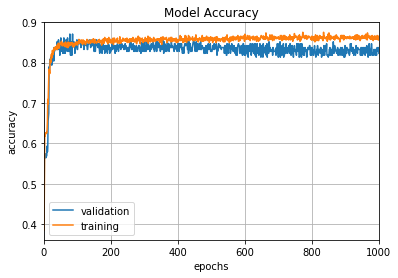

In [121]:
# 4
# fit Adadelta optimizer

model4 = ann_model2()
print(model4.summary())
model4.compile(loss=losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])
history4 = model4.fit(X_train, Y_train, 
                     validation_data=(X_test, Y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)
plot_fig(1, history4)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_286 (Dense)            (None, 7)                 98        
_________________________________________________________________
dense_287 (Dense)            (None, 5)                 40        
_________________________________________________________________
dense_288 (Dense)            (None, 1)                 6         
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________
None
Train on 598 samples, validate on 200 samples
Epoch 1/1000
 - 7s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 2/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 3/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 4/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500

Epoch 79/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 80/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 81/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 82/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 83/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 84/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 85/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 86/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 87/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 88/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 89/1000
 - 0s - loss: -6.1204e-01 

Epoch 164/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 165/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 166/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 167/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 168/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 169/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 170/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 171/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 172/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 173/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 174/1000
 - 0s - loss: -

Epoch 249/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 250/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 251/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 252/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 253/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 254/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 255/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 256/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 257/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 258/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 259/1000
 - 0s - loss: -

Epoch 334/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 335/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 336/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 337/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 338/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 339/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 340/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 341/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 342/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 343/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 344/1000
 - 0s - loss: -

Epoch 419/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 420/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 421/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 422/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 423/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 424/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 425/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 426/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 427/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 428/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 429/1000
 - 0s - loss: -

Epoch 504/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 505/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 506/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 507/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 508/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 509/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 510/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 511/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 512/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 513/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 514/1000
 - 0s - loss: -

Epoch 589/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 590/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 591/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 592/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 593/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 594/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 595/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 596/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 597/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 598/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 599/1000
 - 0s - loss: -

Epoch 674/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 675/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 676/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 677/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 678/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 679/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 680/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 681/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 682/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 683/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 684/1000
 - 0s - loss: -

Epoch 759/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 760/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 761/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 762/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 763/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 764/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 765/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 766/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 767/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 768/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 769/1000
 - 0s - loss: -

Epoch 844/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 845/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 846/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 847/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 848/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 849/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 850/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 851/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 852/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 853/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 854/1000
 - 0s - loss: -

Epoch 929/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 930/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 931/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 932/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 933/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 934/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 935/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 936/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 937/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 938/1000
 - 0s - loss: -6.1204e-01 - acc: 0.6120 - val_loss: -5.5500e-01 - val_acc: 0.5550
Epoch 939/1000
 - 0s - loss: -

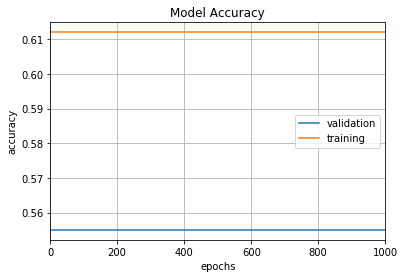

In [168]:
# 5
# fit Adam optimize

model5 = ann_model1()
print(model5.summary())
model5.compile(loss=losses.cosine_proximity,
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])
history5 = model5.fit(X_train, Y_train, 
                     validation_data=(X_test, Y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)
plot_fig(1, history5)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_289 (Dense)            (None, 7)                 98        
_________________________________________________________________
dense_290 (Dense)            (None, 5)                 40        
_________________________________________________________________
dense_291 (Dense)            (None, 1)                 6         
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________
None
Train on 598 samples, validate on 200 samples
Epoch 1/1000
 - 8s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 2/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 3/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 4/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 5/1000
 - 0

Epoch 88/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 89/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 90/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 91/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 92/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 93/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 94/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 95/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 96/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 97/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 98/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 99/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val

Epoch 183/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 184/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 185/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 186/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 187/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 188/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 189/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 190/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 191/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 192/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 193/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 194/1000
 - 0s - loss: 1.0000 - acc: 

 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 278/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 279/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 280/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 281/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 282/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 283/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 284/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 285/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 286/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 287/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 288/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_lo

Epoch 372/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 373/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 374/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 375/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 376/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 377/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 378/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 379/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 380/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 381/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 382/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 383/1000
 - 0s - loss: 1.0000 - acc: 

 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 467/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 468/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 469/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 470/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 471/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 472/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 473/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 474/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 475/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 476/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 477/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_lo

Epoch 561/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 562/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 563/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 564/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 565/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 566/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 567/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 568/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 569/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 570/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 571/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 572/1000
 - 0s - loss: 1.0000 - acc: 

 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 656/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 657/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 658/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 659/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 660/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 661/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 662/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 663/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 664/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 665/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 666/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_lo

Epoch 750/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 751/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 752/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 753/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 754/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 755/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 756/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 757/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 758/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 759/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 760/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 761/1000
 - 0s - loss: 1.0000 - acc: 

 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 845/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 846/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 847/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 848/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 849/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 850/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 851/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 852/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 853/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 854/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 855/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_lo

Epoch 939/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 940/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 941/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 942/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 943/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 944/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 945/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 946/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 947/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 948/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 949/1000
 - 0s - loss: 1.0000 - acc: 0.6120 - val_loss: 1.0000 - val_acc: 0.5550
Epoch 950/1000
 - 0s - loss: 1.0000 - acc: 

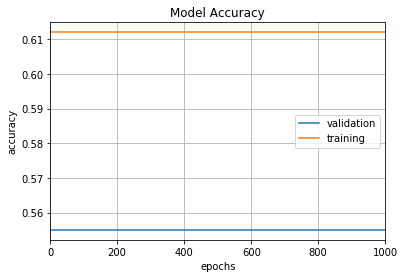

In [169]:
# 6
# fit Adamax optimizer

model6 = ann_model1()
print(model6.summary())
model6.compile(loss=losses.poisson,
              optimizer=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
              metrics=['accuracy'])
history6 = model6.fit(X_train, Y_train, 
                     validation_data=(X_test, Y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)
plot_fig(1, history6)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_292 (Dense)            (None, 7)                 98        
_________________________________________________________________
dense_293 (Dense)            (None, 5)                 40        
_________________________________________________________________
dense_294 (Dense)            (None, 1)                 6         
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________
None
Train on 598 samples, validate on 200 samples
Epoch 1/1000
 - 7s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 2/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 3/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 4/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726

Epoch 79/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 80/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 81/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 82/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 83/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 84/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 85/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 86/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 87/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 88/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 89/1000
 - 0s - loss: -6.2532e-07 

Epoch 164/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 165/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 166/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 167/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 168/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 169/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 170/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 171/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 172/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 173/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 174/1000
 - 0s - loss: -

Epoch 249/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 250/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 251/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 252/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 253/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 254/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 255/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 256/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 257/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 258/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 259/1000
 - 0s - loss: -

Epoch 334/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 335/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 336/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 337/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 338/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 339/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 340/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 341/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 342/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 343/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 344/1000
 - 0s - loss: -

Epoch 419/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 420/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 421/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 422/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 423/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 424/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 425/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 426/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 427/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 428/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 429/1000
 - 0s - loss: -

Epoch 504/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 505/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 506/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 507/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 508/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 509/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 510/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 511/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 512/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 513/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 514/1000
 - 0s - loss: -

Epoch 589/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 590/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 591/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 592/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 593/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 594/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 595/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 596/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 597/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 598/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 599/1000
 - 0s - loss: -

Epoch 674/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 675/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 676/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 677/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 678/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 679/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 680/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 681/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 682/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 683/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 684/1000
 - 0s - loss: -

Epoch 759/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 760/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 761/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 762/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 763/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 764/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 765/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 766/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 767/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 768/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 769/1000
 - 0s - loss: -

Epoch 844/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 845/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 846/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 847/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 848/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 849/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 850/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 851/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 852/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 853/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 854/1000
 - 0s - loss: -

Epoch 929/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 930/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 931/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 932/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 933/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 934/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 935/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 936/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 937/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 938/1000
 - 0s - loss: -6.2532e-07 - acc: 0.6120 - val_loss: -7.1726e-07 - val_acc: 0.5550
Epoch 939/1000
 - 0s - loss: -

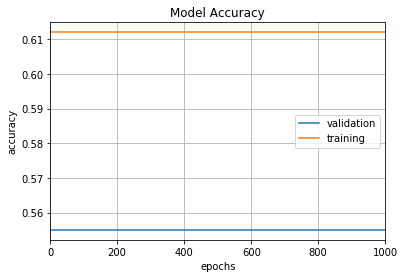

In [170]:
# 7
# fit Nadam optimizer

model7 = ann_model1()
print(model7.summary())
model7.compile(loss=losses.kullback_leibler_divergence,
              optimizer=keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
              metrics=['accuracy'])
history7 = model7.fit(X_train, Y_train, 
                     validation_data=(X_test, Y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)
plot_fig(1, history7)

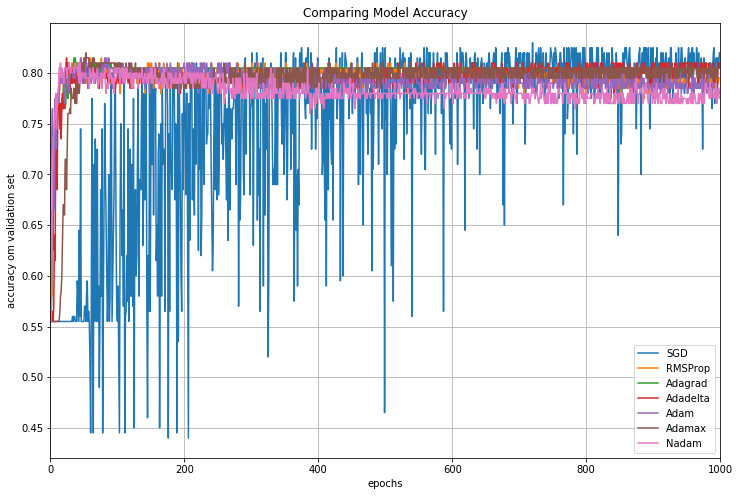

In [98]:
fig = plt.figure(figsize=(12,8))
plt.plot(range(epochs),history1.history['val_acc'],label='SGD')
plt.plot(range(epochs),history2.history['val_acc'],label='RMSProp')
plt.plot(range(epochs),history3.history['val_acc'],label='Adagrad')
plt.plot(range(epochs),history4.history['val_acc'],label='Adadelta')
plt.plot(range(epochs),history5.history['val_acc'],label='Adam')
plt.plot(range(epochs),history6.history['val_acc'],label='Adamax')
plt.plot(range(epochs),history7.history['val_acc'],label='Nadam')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.xlim([0,epochs])
plt.ylabel('accuracy om validation set')
plt.grid(True)
plt.title("Comparing Model Accuracy")
plt.show()
#fig.savefig('img/compare-accuracy.jpg')
plt.close(fig)


In [67]:
from keras import optimizers

model = Sequential()
model.add(Dense(15, kernel_initializer='uniform', input_shape=(15,)))
model.add(Dense(10, activation= 'relu'))
model.add(Dense(2,activation="softmax"))


#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)

model.compile(
    Adam(lr=.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

#rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

#model.compile(loss='sparse_categorical_crossentropy', optimizer=rms)

Train on 626 samples, validate on 209 samples
Epoch 1/100
 - 1s - loss: 0.7629 - acc: 0.3914 - val_loss: 0.6895 - val_acc: 0.4258
Epoch 2/100
 - 0s - loss: 0.6849 - acc: 0.5383 - val_loss: 0.6794 - val_acc: 0.6316
Epoch 3/100
 - 0s - loss: 0.6802 - acc: 0.6358 - val_loss: 0.6769 - val_acc: 0.6459
Epoch 4/100
 - 0s - loss: 0.6774 - acc: 0.6054 - val_loss: 0.6743 - val_acc: 0.6268
Epoch 5/100
 - 0s - loss: 0.6745 - acc: 0.6805 - val_loss: 0.6714 - val_acc: 0.6459
Epoch 6/100
 - 0s - loss: 0.6717 - acc: 0.6661 - val_loss: 0.6688 - val_acc: 0.6364
Epoch 7/100
 - 0s - loss: 0.6684 - acc: 0.6821 - val_loss: 0.6660 - val_acc: 0.7033
Epoch 8/100
 - 0s - loss: 0.6658 - acc: 0.6741 - val_loss: 0.6641 - val_acc: 0.7656
Epoch 9/100
 - 0s - loss: 0.6625 - acc: 0.7220 - val_loss: 0.6600 - val_acc: 0.7368
Epoch 10/100
 - 0s - loss: 0.6599 - acc: 0.6869 - val_loss: 0.6588 - val_acc: 0.7560
Epoch 11/100
 - 0s - loss: 0.6568 - acc: 0.7252 - val_loss: 0.6541 - val_acc: 0.7081
Epoch 12/100
 - 0s - loss: 0

Epoch 97/100
 - 0s - loss: 0.4642 - acc: 0.8498 - val_loss: 0.4851 - val_acc: 0.8325
Epoch 98/100
 - 0s - loss: 0.4642 - acc: 0.8498 - val_loss: 0.4822 - val_acc: 0.8325
Epoch 99/100
 - 0s - loss: 0.4620 - acc: 0.8482 - val_loss: 0.4829 - val_acc: 0.8325
Epoch 100/100
 - 0s - loss: 0.4628 - acc: 0.8546 - val_loss: 0.4805 - val_acc: 0.8325


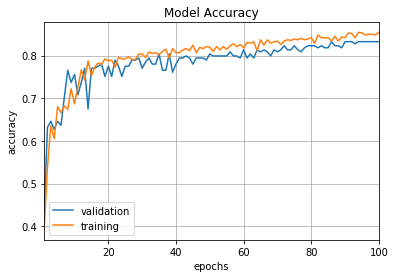

In [68]:
epochs = 100
history1 = model.fit(X_train, Y_train,validation_data = (X_test,Y_test),
          batch_size=20,epochs=epochs,shuffle=True,verbose=2)


plot_fig(1, history1)

In [156]:
#for 798 x 13
#with ADAM and crossentropy
model = Sequential([
    Dense(7,input_shape=(15,),activation="relu"),
    Dense(5,activation="relu"),
    Dense(2,activation="softmax")
    
])

model.summary()

model.compile(
    Adam(lr=.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

'''
model.compile(
    Adam(lr=.001),loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

model.compile(
    Adam(lr=.001),loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

'''

#relu
#LeakyReLU
#PReLU
#softmax
#sigmoid
#hard_sigmoid
#tanh
#elu
#ELU
#selu
#softplus
#softsign
#
#
#

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 7)                 112       
_________________________________________________________________
dense_114 (Dense)            (None, 5)                 40        
_________________________________________________________________
dense_115 (Dense)            (None, 2)                 12        
Total params: 164
Trainable params: 164
Non-trainable params: 0
_________________________________________________________________


"\nmodel.compile(\n    Adam(lr=.001),loss='sparse_categorical_crossentropy',metrics=['accuracy']\n)\n\nmodel.compile(\n    Adam(lr=.001),loss='sparse_categorical_crossentropy',metrics=['accuracy']\n)\n\nmodel.compile(loss='categorical_crossentropy',\n              optimizer='adam',\n              metrics=['accuracy'])\n\n"

In [14]:
#model.fit(X_train, Y_train,batch_size=25,epochs=2000,shuffle=True,verbose=2)

Train on 626 samples, validate on 209 samples
Epoch 1/100
 - 2s - loss: 3.7037 - acc: 0.3866 - val_loss: 2.5380 - val_acc: 0.4306
Epoch 2/100
 - 0s - loss: 2.2029 - acc: 0.3866 - val_loss: 1.5318 - val_acc: 0.4306
Epoch 3/100
 - 0s - loss: 1.3535 - acc: 0.3866 - val_loss: 0.9960 - val_acc: 0.4306
Epoch 4/100
 - 0s - loss: 0.9293 - acc: 0.3866 - val_loss: 0.7789 - val_acc: 0.4306
Epoch 5/100
 - 0s - loss: 0.7493 - acc: 0.3514 - val_loss: 0.6999 - val_acc: 0.4689
Epoch 6/100
 - 0s - loss: 0.6781 - acc: 0.5911 - val_loss: 0.6590 - val_acc: 0.6651
Epoch 7/100
 - 0s - loss: 0.6416 - acc: 0.6454 - val_loss: 0.6406 - val_acc: 0.6316
Epoch 8/100
 - 0s - loss: 0.6202 - acc: 0.6613 - val_loss: 0.6233 - val_acc: 0.6938
Epoch 9/100
 - 0s - loss: 0.6041 - acc: 0.6837 - val_loss: 0.6093 - val_acc: 0.6938
Epoch 10/100
 - 0s - loss: 0.5848 - acc: 0.7268 - val_loss: 0.5960 - val_acc: 0.6986
Epoch 11/100
 - 0s - loss: 0.5666 - acc: 0.7396 - val_loss: 0.5757 - val_acc: 0.7656
Epoch 12/100
 - 0s - loss: 0

Epoch 97/100
 - 0s - loss: 0.3789 - acc: 0.8578 - val_loss: 0.4525 - val_acc: 0.8230
Epoch 98/100
 - 0s - loss: 0.3781 - acc: 0.8562 - val_loss: 0.4458 - val_acc: 0.8278
Epoch 99/100
 - 0s - loss: 0.3810 - acc: 0.8578 - val_loss: 0.4380 - val_acc: 0.8278
Epoch 100/100
 - 0s - loss: 0.3822 - acc: 0.8546 - val_loss: 0.4395 - val_acc: 0.8278


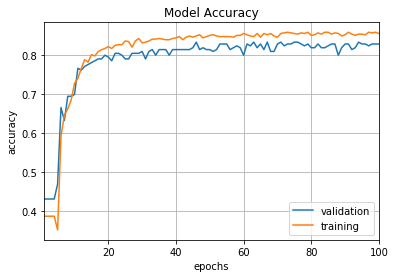

In [157]:
model.compile(
    Adam(lr=.001),loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

histogrum10 = model.fit(X_train, Y_train,validation_data = (X_test,Y_test),
          batch_size=20,epochs=100,shuffle=True,verbose=2)
epochs=100
plot_fig(1, histogrum10)

In [44]:
model.compile(
    Adam(lr=.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

model.fit(X_train, Y_train,validation_data = (X_test,Y_test),
          batch_size=20,epochs=100,shuffle=True,verbose=2)

Train on 638 samples, validate on 160 samples
Epoch 1/100
 - 0s - loss: 0.3409 - acc: 0.8621 - val_loss: 0.3656 - val_acc: 0.8500
Epoch 2/100
 - 0s - loss: 0.3404 - acc: 0.8605 - val_loss: 0.3658 - val_acc: 0.8500
Epoch 3/100
 - 0s - loss: 0.3399 - acc: 0.8589 - val_loss: 0.3661 - val_acc: 0.8500
Epoch 4/100
 - 0s - loss: 0.3394 - acc: 0.8589 - val_loss: 0.3664 - val_acc: 0.8500
Epoch 5/100
 - 0s - loss: 0.3391 - acc: 0.8589 - val_loss: 0.3666 - val_acc: 0.8500
Epoch 6/100
 - 0s - loss: 0.3388 - acc: 0.8589 - val_loss: 0.3669 - val_acc: 0.8500
Epoch 7/100
 - 0s - loss: 0.3385 - acc: 0.8589 - val_loss: 0.3673 - val_acc: 0.8500
Epoch 8/100
 - 0s - loss: 0.3383 - acc: 0.8589 - val_loss: 0.3676 - val_acc: 0.8562
Epoch 9/100
 - 0s - loss: 0.3381 - acc: 0.8589 - val_loss: 0.3678 - val_acc: 0.8562
Epoch 10/100
 - 0s - loss: 0.3380 - acc: 0.8605 - val_loss: 0.3680 - val_acc: 0.8562
Epoch 11/100
 - 0s - loss: 0.3379 - acc: 0.8605 - val_loss: 0.3683 - val_acc: 0.8562
Epoch 12/100
 - 0s - loss: 0

Epoch 97/100
 - 0s - loss: 0.3370 - acc: 0.8605 - val_loss: 0.3714 - val_acc: 0.8687
Epoch 98/100
 - 0s - loss: 0.3371 - acc: 0.8605 - val_loss: 0.3715 - val_acc: 0.8687
Epoch 99/100
 - 0s - loss: 0.3370 - acc: 0.8605 - val_loss: 0.3712 - val_acc: 0.8687
Epoch 100/100
 - 0s - loss: 0.3370 - acc: 0.8605 - val_loss: 0.3713 - val_acc: 0.8687


In [63]:
# Create Model 
'''
model = Sequential() 
model.add(Dense(7, input_shape=(15,) , activation= 'relu'))
model.add(Dense(6, activation= 'relu'))
model.add(Dense(2 , activation = 'softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)

model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])
model.summary()
'''
# Create Model 

model = Sequential() 
model.add(Dense(7, input_shape=(15,) , activation= 'relu'))
#model.add(Dense(16, activation= 'relu'))
model.add(Dense(2 , activation = 'softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)

model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 7)                 112       
_________________________________________________________________
dense_60 (Dense)             (None, 2)                 16        
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


Train on 626 samples, validate on 209 samples
Epoch 1/1000
 - 1s - loss: 0.7751 - acc: 0.5511 - val_loss: 0.6675 - val_acc: 0.5789
Epoch 2/1000
 - 0s - loss: 0.6602 - acc: 0.6198 - val_loss: 0.6911 - val_acc: 0.5215
Epoch 3/1000
 - 0s - loss: 0.6437 - acc: 0.6166 - val_loss: 0.6396 - val_acc: 0.5837
Epoch 4/1000
 - 0s - loss: 0.6178 - acc: 0.6661 - val_loss: 0.6088 - val_acc: 0.7895
Epoch 5/1000
 - 0s - loss: 0.6146 - acc: 0.7141 - val_loss: 0.5845 - val_acc: 0.8086
Epoch 6/1000
 - 0s - loss: 0.5758 - acc: 0.7412 - val_loss: 0.6656 - val_acc: 0.5359
Epoch 7/1000
 - 0s - loss: 0.5978 - acc: 0.6821 - val_loss: 0.5420 - val_acc: 0.8134
Epoch 8/1000
 - 0s - loss: 0.5094 - acc: 0.8115 - val_loss: 0.5536 - val_acc: 0.7656
Epoch 9/1000
 - 0s - loss: 0.4871 - acc: 0.8243 - val_loss: 0.7644 - val_acc: 0.4402
Epoch 10/1000
 - 0s - loss: 0.6065 - acc: 0.6805 - val_loss: 0.5243 - val_acc: 0.8134
Epoch 11/1000
 - 0s - loss: 0.4739 - acc: 0.8227 - val_loss: 0.4828 - val_acc: 0.8182
Epoch 12/1000
 - 

Epoch 96/1000
 - 0s - loss: 0.4939 - acc: 0.8083 - val_loss: 0.4778 - val_acc: 0.8278
Epoch 97/1000
 - 0s - loss: 0.4075 - acc: 0.8435 - val_loss: 0.5443 - val_acc: 0.7177
Epoch 98/1000
 - 0s - loss: 0.5392 - acc: 0.7987 - val_loss: 0.6457 - val_acc: 0.8038
Epoch 99/1000
 - 0s - loss: 0.4582 - acc: 0.8339 - val_loss: 0.6966 - val_acc: 0.7799
Epoch 100/1000
 - 0s - loss: 0.5791 - acc: 0.8115 - val_loss: 0.8965 - val_acc: 0.4211
Epoch 101/1000
 - 0s - loss: 0.5429 - acc: 0.7652 - val_loss: 0.5039 - val_acc: 0.8134
Epoch 102/1000
 - 0s - loss: 0.4637 - acc: 0.8243 - val_loss: 0.4783 - val_acc: 0.8278
Epoch 103/1000
 - 0s - loss: 0.4813 - acc: 0.7939 - val_loss: 0.4837 - val_acc: 0.7895
Epoch 104/1000
 - 0s - loss: 0.5026 - acc: 0.7955 - val_loss: 0.4812 - val_acc: 0.8278
Epoch 105/1000
 - 0s - loss: 0.4636 - acc: 0.8115 - val_loss: 0.4600 - val_acc: 0.8278
Epoch 106/1000
 - 0s - loss: 0.4245 - acc: 0.8419 - val_loss: 0.5396 - val_acc: 0.8134
Epoch 107/1000
 - 0s - loss: 0.4162 - acc: 0.84

Epoch 191/1000
 - 0s - loss: 0.4118 - acc: 0.8514 - val_loss: 0.4875 - val_acc: 0.7799
Epoch 192/1000
 - 0s - loss: 0.4741 - acc: 0.8211 - val_loss: 0.6057 - val_acc: 0.7943
Epoch 193/1000
 - 0s - loss: 0.4963 - acc: 0.7987 - val_loss: 0.5827 - val_acc: 0.8134
Epoch 194/1000
 - 0s - loss: 0.5770 - acc: 0.7572 - val_loss: 0.7473 - val_acc: 0.4976
Epoch 195/1000
 - 0s - loss: 0.5134 - acc: 0.7827 - val_loss: 0.4590 - val_acc: 0.8278
Epoch 196/1000
 - 0s - loss: 0.4452 - acc: 0.8259 - val_loss: 0.4756 - val_acc: 0.8278
Epoch 197/1000
 - 0s - loss: 0.4275 - acc: 0.8419 - val_loss: 0.4703 - val_acc: 0.8278
Epoch 198/1000
 - 0s - loss: 0.4910 - acc: 0.8003 - val_loss: 0.4541 - val_acc: 0.8325
Epoch 199/1000
 - 0s - loss: 0.4407 - acc: 0.8387 - val_loss: 0.4789 - val_acc: 0.7990
Epoch 200/1000
 - 0s - loss: 0.4031 - acc: 0.8435 - val_loss: 0.4545 - val_acc: 0.8278
Epoch 201/1000
 - 0s - loss: 0.4217 - acc: 0.8419 - val_loss: 0.5039 - val_acc: 0.7751
Epoch 202/1000
 - 0s - loss: 0.4741 - acc: 

 - 0s - loss: 0.4483 - acc: 0.8243 - val_loss: 0.5197 - val_acc: 0.8134
Epoch 286/1000
 - 0s - loss: 0.4330 - acc: 0.8514 - val_loss: 0.5676 - val_acc: 0.8038
Epoch 287/1000
 - 0s - loss: 0.4416 - acc: 0.8179 - val_loss: 0.4577 - val_acc: 0.8134
Epoch 288/1000
 - 0s - loss: 0.4289 - acc: 0.8403 - val_loss: 0.4946 - val_acc: 0.8278
Epoch 289/1000
 - 0s - loss: 0.4235 - acc: 0.8307 - val_loss: 0.5406 - val_acc: 0.7273
Epoch 290/1000
 - 0s - loss: 0.5352 - acc: 0.7620 - val_loss: 0.7891 - val_acc: 0.7895
Epoch 291/1000
 - 0s - loss: 0.4855 - acc: 0.8099 - val_loss: 0.5103 - val_acc: 0.7751
Epoch 292/1000
 - 0s - loss: 0.4275 - acc: 0.8339 - val_loss: 0.4828 - val_acc: 0.8278
Epoch 293/1000
 - 0s - loss: 0.4514 - acc: 0.8419 - val_loss: 0.5319 - val_acc: 0.7368
Epoch 294/1000
 - 0s - loss: 0.5198 - acc: 0.7732 - val_loss: 0.4498 - val_acc: 0.8325
Epoch 295/1000
 - 0s - loss: 0.4507 - acc: 0.8371 - val_loss: 0.5257 - val_acc: 0.7464
Epoch 296/1000
 - 0s - loss: 0.4241 - acc: 0.8339 - val_lo

Epoch 380/1000
 - 0s - loss: 0.4599 - acc: 0.8291 - val_loss: 0.4486 - val_acc: 0.8278
Epoch 381/1000
 - 0s - loss: 0.4291 - acc: 0.8307 - val_loss: 0.5623 - val_acc: 0.8038
Epoch 382/1000
 - 0s - loss: 0.4392 - acc: 0.8355 - val_loss: 0.4458 - val_acc: 0.8278
Epoch 383/1000
 - 0s - loss: 0.4729 - acc: 0.8035 - val_loss: 0.4542 - val_acc: 0.8182
Epoch 384/1000
 - 0s - loss: 0.4476 - acc: 0.8339 - val_loss: 0.4538 - val_acc: 0.8278
Epoch 385/1000
 - 0s - loss: 0.4717 - acc: 0.8083 - val_loss: 0.5498 - val_acc: 0.7273
Epoch 386/1000
 - 0s - loss: 0.4280 - acc: 0.8355 - val_loss: 0.5405 - val_acc: 0.8134
Epoch 387/1000
 - 0s - loss: 0.4559 - acc: 0.8419 - val_loss: 0.5059 - val_acc: 0.8134
Epoch 388/1000
 - 0s - loss: 0.4181 - acc: 0.8419 - val_loss: 0.4736 - val_acc: 0.8278
Epoch 389/1000
 - 0s - loss: 0.4316 - acc: 0.8435 - val_loss: 0.4502 - val_acc: 0.8278
Epoch 390/1000
 - 0s - loss: 0.4109 - acc: 0.8450 - val_loss: 0.4529 - val_acc: 0.8182
Epoch 391/1000
 - 0s - loss: 0.4738 - acc: 

 - 0s - loss: 0.4108 - acc: 0.8419 - val_loss: 0.4483 - val_acc: 0.8278
Epoch 475/1000
 - 0s - loss: 0.4114 - acc: 0.8387 - val_loss: 0.6368 - val_acc: 0.5789
Epoch 476/1000
 - 0s - loss: 0.4689 - acc: 0.8131 - val_loss: 0.4734 - val_acc: 0.8230
Epoch 477/1000
 - 0s - loss: 0.4817 - acc: 0.8179 - val_loss: 0.4459 - val_acc: 0.8278
Epoch 478/1000
 - 0s - loss: 0.4484 - acc: 0.8355 - val_loss: 0.4482 - val_acc: 0.8278
Epoch 479/1000
 - 0s - loss: 0.4473 - acc: 0.8435 - val_loss: 0.4743 - val_acc: 0.8278
Epoch 480/1000
 - 0s - loss: 0.4569 - acc: 0.8211 - val_loss: 0.7050 - val_acc: 0.7895
Epoch 481/1000
 - 0s - loss: 0.4637 - acc: 0.8227 - val_loss: 0.4570 - val_acc: 0.8278
Epoch 482/1000
 - 0s - loss: 0.5331 - acc: 0.7875 - val_loss: 0.8691 - val_acc: 0.4593
Epoch 483/1000
 - 0s - loss: 0.5030 - acc: 0.7764 - val_loss: 0.8847 - val_acc: 0.7656
Epoch 484/1000
 - 0s - loss: 0.5127 - acc: 0.8179 - val_loss: 0.4862 - val_acc: 0.7895
Epoch 485/1000
 - 0s - loss: 0.4286 - acc: 0.8403 - val_lo

Epoch 569/1000
 - 0s - loss: 0.4724 - acc: 0.8227 - val_loss: 0.6236 - val_acc: 0.6507
Epoch 570/1000
 - 0s - loss: 0.5381 - acc: 0.7859 - val_loss: 0.4749 - val_acc: 0.7990
Epoch 571/1000
 - 0s - loss: 0.4438 - acc: 0.8355 - val_loss: 0.4563 - val_acc: 0.8230
Epoch 572/1000
 - 0s - loss: 0.4627 - acc: 0.8387 - val_loss: 0.4549 - val_acc: 0.8230
Epoch 573/1000
 - 0s - loss: 0.4856 - acc: 0.7923 - val_loss: 0.4624 - val_acc: 0.8134
Epoch 574/1000
 - 0s - loss: 0.4563 - acc: 0.8291 - val_loss: 0.4709 - val_acc: 0.8278
Epoch 575/1000
 - 0s - loss: 0.4349 - acc: 0.8435 - val_loss: 0.5094 - val_acc: 0.8134
Epoch 576/1000
 - 0s - loss: 0.4530 - acc: 0.8307 - val_loss: 0.5412 - val_acc: 0.7368
Epoch 577/1000
 - 0s - loss: 0.4982 - acc: 0.8131 - val_loss: 0.4590 - val_acc: 0.8230
Epoch 578/1000
 - 0s - loss: 0.4190 - acc: 0.8403 - val_loss: 0.4513 - val_acc: 0.8325
Epoch 579/1000
 - 0s - loss: 0.4269 - acc: 0.8450 - val_loss: 0.4564 - val_acc: 0.8230
Epoch 580/1000
 - 0s - loss: 0.4288 - acc: 

 - 0s - loss: 0.4250 - acc: 0.8419 - val_loss: 0.4524 - val_acc: 0.8230
Epoch 664/1000
 - 0s - loss: 0.4830 - acc: 0.8019 - val_loss: 0.5428 - val_acc: 0.8278
Epoch 665/1000
 - 0s - loss: 0.4637 - acc: 0.8291 - val_loss: 0.4533 - val_acc: 0.8278
Epoch 666/1000
 - 0s - loss: 0.4215 - acc: 0.8435 - val_loss: 0.5655 - val_acc: 0.8134
Epoch 667/1000
 - 0s - loss: 0.4176 - acc: 0.8387 - val_loss: 0.4826 - val_acc: 0.8134
Epoch 668/1000
 - 0s - loss: 0.4910 - acc: 0.7987 - val_loss: 0.4691 - val_acc: 0.8278
Epoch 669/1000
 - 0s - loss: 0.4376 - acc: 0.8323 - val_loss: 0.4558 - val_acc: 0.8134
Epoch 670/1000
 - 0s - loss: 0.4210 - acc: 0.8323 - val_loss: 0.4753 - val_acc: 0.8278
Epoch 671/1000
 - 0s - loss: 0.4185 - acc: 0.8419 - val_loss: 0.4565 - val_acc: 0.8230
Epoch 672/1000
 - 0s - loss: 0.4419 - acc: 0.8099 - val_loss: 0.4562 - val_acc: 0.8278
Epoch 673/1000
 - 0s - loss: 0.4286 - acc: 0.8403 - val_loss: 0.4754 - val_acc: 0.8230
Epoch 674/1000
 - 0s - loss: 0.4149 - acc: 0.8482 - val_lo

Epoch 758/1000
 - 0s - loss: 0.4615 - acc: 0.8147 - val_loss: 0.4631 - val_acc: 0.8038
Epoch 759/1000
 - 0s - loss: 0.4740 - acc: 0.8195 - val_loss: 0.5125 - val_acc: 0.8182
Epoch 760/1000
 - 0s - loss: 0.4358 - acc: 0.8323 - val_loss: 0.4702 - val_acc: 0.8278
Epoch 761/1000
 - 0s - loss: 0.4399 - acc: 0.8387 - val_loss: 0.5494 - val_acc: 0.8278
Epoch 762/1000
 - 0s - loss: 0.4682 - acc: 0.8291 - val_loss: 0.4448 - val_acc: 0.8278
Epoch 763/1000
 - 0s - loss: 0.4501 - acc: 0.8195 - val_loss: 0.4475 - val_acc: 0.8278
Epoch 764/1000
 - 0s - loss: 0.4105 - acc: 0.8355 - val_loss: 0.4497 - val_acc: 0.8230
Epoch 765/1000
 - 0s - loss: 0.4772 - acc: 0.7939 - val_loss: 0.5501 - val_acc: 0.8182
Epoch 766/1000
 - 0s - loss: 0.4437 - acc: 0.8275 - val_loss: 0.4562 - val_acc: 0.8230
Epoch 767/1000
 - 0s - loss: 0.4751 - acc: 0.8387 - val_loss: 0.5227 - val_acc: 0.7608
Epoch 768/1000
 - 0s - loss: 0.4465 - acc: 0.8195 - val_loss: 0.5359 - val_acc: 0.8134
Epoch 769/1000
 - 0s - loss: 0.4282 - acc: 

 - 0s - loss: 0.5354 - acc: 0.7923 - val_loss: 0.4530 - val_acc: 0.8134
Epoch 853/1000
 - 0s - loss: 0.4286 - acc: 0.8371 - val_loss: 0.5415 - val_acc: 0.8134
Epoch 854/1000
 - 0s - loss: 0.4589 - acc: 0.8195 - val_loss: 0.4622 - val_acc: 0.8038
Epoch 855/1000
 - 0s - loss: 0.4268 - acc: 0.8339 - val_loss: 0.4519 - val_acc: 0.8278
Epoch 856/1000
 - 0s - loss: 0.4325 - acc: 0.8307 - val_loss: 0.4686 - val_acc: 0.7990
Epoch 857/1000
 - 0s - loss: 0.4332 - acc: 0.8307 - val_loss: 0.5161 - val_acc: 0.8278
Epoch 858/1000
 - 0s - loss: 0.4650 - acc: 0.8115 - val_loss: 0.4433 - val_acc: 0.8278
Epoch 859/1000
 - 0s - loss: 0.4093 - acc: 0.8403 - val_loss: 0.4543 - val_acc: 0.8230
Epoch 860/1000
 - 0s - loss: 0.4239 - acc: 0.8466 - val_loss: 0.4584 - val_acc: 0.8134
Epoch 861/1000
 - 0s - loss: 0.4192 - acc: 0.8291 - val_loss: 0.4738 - val_acc: 0.8278
Epoch 862/1000
 - 0s - loss: 0.4309 - acc: 0.8355 - val_loss: 0.4473 - val_acc: 0.8278
Epoch 863/1000
 - 0s - loss: 0.4113 - acc: 0.8419 - val_lo

Epoch 947/1000
 - 0s - loss: 0.4257 - acc: 0.8387 - val_loss: 0.5522 - val_acc: 0.8278
Epoch 948/1000
 - 0s - loss: 0.4680 - acc: 0.8099 - val_loss: 0.5733 - val_acc: 0.8230
Epoch 949/1000
 - 0s - loss: 0.4403 - acc: 0.8435 - val_loss: 0.4592 - val_acc: 0.8230
Epoch 950/1000
 - 0s - loss: 0.4246 - acc: 0.8514 - val_loss: 0.4838 - val_acc: 0.8278
Epoch 951/1000
 - 0s - loss: 0.4932 - acc: 0.8147 - val_loss: 0.5135 - val_acc: 0.8230
Epoch 952/1000
 - 0s - loss: 0.4338 - acc: 0.8355 - val_loss: 0.6522 - val_acc: 0.8086
Epoch 953/1000
 - 0s - loss: 0.4427 - acc: 0.8291 - val_loss: 0.4699 - val_acc: 0.8230
Epoch 954/1000
 - 0s - loss: 0.4915 - acc: 0.8083 - val_loss: 0.4504 - val_acc: 0.8278
Epoch 955/1000
 - 0s - loss: 0.4064 - acc: 0.8435 - val_loss: 0.4758 - val_acc: 0.8278
Epoch 956/1000
 - 0s - loss: 0.4344 - acc: 0.8259 - val_loss: 0.4989 - val_acc: 0.8230
Epoch 957/1000
 - 0s - loss: 0.4503 - acc: 0.8195 - val_loss: 0.4527 - val_acc: 0.8278
Epoch 958/1000
 - 0s - loss: 0.4174 - acc: 

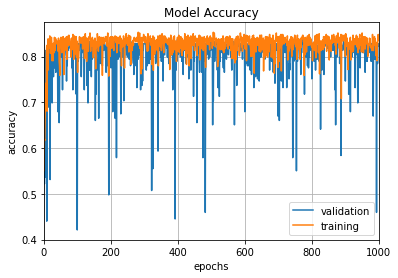

In [64]:
histogrum10 = model.fit(X_train, Y_train,validation_data = (X_test,Y_test),
          batch_size=20,epochs=1000,shuffle=True,verbose=2)
epochs=1000
plot_fig(1, histogrum10)

### model.fit(X_train, Y_train, epochs=100)

In [151]:
rounded_predections = model.predict_classes(X_test,batch_size=10,verbose=0)

In [152]:
score = model.evaluate(X_test, Y_test, batch_size=128)

167/167 [==============================] - 0s 60us/step


In [153]:
score

[0.38814316449051134, 0.8562874269342708]

In [154]:
cm = confusion_matrix(Y_test,rounded_predections)

In [157]:
rounded_predections_train = model.predict_classes(X_train,batch_size=10,verbose=0)
cm = confusion_matrix(Y_train,rounded_predections_train)

In [158]:
cm

array([[193,  77],
       [ 34, 364]])

In [209]:
cm2

array([[83,  4],
       [ 1, 79]])

numer of total test sample:  668
Model Score:  [0.38814316449051134, 0.8562874269342708]
accuracy:  0.8338323353293413
missclassafication_rate:  0.1661676646706587
Sensitivity/Recall:  0.914572864321608
Spacificity:  0.7148148148148148
Precition:  0.8253968253968254
prevalence:  0.5958083832335329
Positive Predicted Value:  0.8253968253968254
Negative Predicted Value:  0.8502202643171806
F Score:  0.8676996424314659


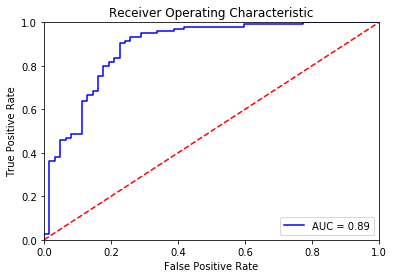

In [159]:
performance()
ROC_curve_generator()


In [16]:
def ROC_curve_generator():
    #ROC curve

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [17]:
def performance():
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]

    n =TN+FP+FN+TP
    print("numer of total test sample: ",n)

    print("Model Score: ", score)

    accuracy = (TP+TN)/n
    print("accuracy: ",accuracy)

    missclassafication_rate = 1-accuracy
    print("missclassafication_rate: ",missclassafication_rate)

    sensitivity = TP/(TP+FN)
    print("Sensitivity/Recall: ",sensitivity)

    spasificity = TN/(TN+FP)
    print("Spacificity: ",spasificity)

    precition = TP/(FP+TP)
    print("Precition: ",precition)

    prevalence = (FN+TP)/n
    print("prevalence: ",prevalence)

    PPV = TP/(TP+FP)
    print("Positive Predicted Value: ",PPV)

    NPV = TN/(TN+FN)
    print("Negative Predicted Value: ",NPV)

    beta = 0.5
    f_score = 1/(beta*(1/precition)+(1-beta)*(1/sensitivity))
    print("F Score: ",f_score)

In [18]:
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img-'+str(i)+'-accuracy.jpg')
    plt.close(fig)

In [117]:
model.save("heart_attack_risk_prediction_with_percent_split_"+str(score[1])".h5")